In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import zscore

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [70]:
# Load the dataset
df = pd.read_csv(r'data\spotify_2015_2025_85k.csv', sep=',')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: (85000, 19)
Memory usage: 45.98 MB


In [71]:
# Display first few rows
df.head(10)

track_id                      track_name        artist_name  \
0  TRK-BEBD53DA84E1                 Agent every (0)        Noah Rhodes   
1  TRK-6A32496762D7                   Night respond      Jennifer Cole   
2  TRK-47AA7523463E          Future choice whatever      Brandon Davis   
3  TRK-25ADA22E3B06             Bad fall pick those        Corey Jones   
4  TRK-9245F2AD996A                         Husband          Mark Diaz   
5  TRK-A249E0859674                       Move each     Devin Schaefer   
6  TRK-80176DE44638                      Husband at     Latoya Robbins   
7  TRK-75503F2042FD  Much section investment on gun  Brenda Snyder PhD   
8  TRK-5BB824DBF141                       His other         David Tran   
9  TRK-3EB4332CA819                        Specific      Ashley Graham   

          album_name release_date      genre  duration_ms  popularity  \
0  Beautiful instead   2016-04-01        Pop       234194          55   
1              Table   2022-04-15      Metal       375706          45   
2      Page southern   2016-02-23       Rock       289191          55   
3             Spring   2015-10-12        Pop       209484          51   
4        Great prove   2022-07-08      Indie       127435          39   
5        Detail food   2018-01-01       Rock       200615          36   
6            Reality   2023-05-10    Country       372579          38   
7              Claim   2015-09-18  Classical       290078          70   
8           Response   2019-11-16    Hip-Hop       327881          66   
9       About reveal   2021-01-18    Country        90299          40   

   danceability  energy  key  loudness  mode  instrumentalness   tempo  \
0          0.15    0.74    9    -32.22     0             0.436   73.12   
1          0.44    0.46    0    -14.02     0             0.223  157.74   
2          0.62    0.80    8    -48.26     1             0.584   71.03   
3          0.78    0.98    1    -34.47     1             0.684  149.00   
4          0.74    0.18   10    -17.84     0             0.304  155.85   
5          0.91    0.57    3    -19.61     1             0.574  183.86   
6          0.89    0.41    2    -27.49     0             0.175  165.81   
7          0.61    0.47    8     -8.52     0             0.201  155.24   
8          0.73    0.96    8     -5.72     1             0.610  177.83   
9          0.61    0.49    5     -7.55     1             0.089   93.52   

   stream_count         country  explicit            label  
0         13000          Brazil         0  Universal Music  
1          1000          France         1   Island Records  
2          1000         Germany         1    XL Recordings  
3          1000          France         0     Warner Music  
4          2000   United States         0      Independent  
5          1000       Australia         0     Warner Music  
6          1000  United Kingdom         0     Warner Music  
7         21000  United Kingdom         0   Island Records  
8          6000           Japan         0      Independent  
9          1000          Brazil         1       Sony Music

In [72]:
# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
df.info()

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null  int64  
 16  country           85000

In [73]:
# Display column names and data types
print("\nColumn Names and Types:")
print("-" * 60)
for col in df.columns:
    print(f"{col:20s} : {str(df[col].dtype):15s}")


Column Names and Types:
------------------------------------------------------------
track_id             : object         
track_name           : object         
artist_name          : object         
album_name           : object         
release_date         : object         
genre                : object         
duration_ms          : int64          
popularity           : int64          
danceability         : float64        
energy               : float64        
key                  : int64          
loudness             : float64        
mode                 : int64          
instrumentalness     : float64        
tempo                : float64        
stream_count         : int64          
country              : object         
explicit             : int64          
label                : object         


In [74]:
# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


MISSING VALUES ANALYSIS
            Missing Count  Percentage
album_name             46    0.054118
track_name             21    0.024706


In [75]:
# Check for duplicate rows
print("\n" + "=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")


DUPLICATE ROWS ANALYSIS
Total duplicate rows: 0
Percentage of duplicates: 0.00%


In [76]:
# Statistical summary for numerical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].describe()


STATISTICAL SUMMARY - NUMERICAL COLUMNS


duration_ms    popularity  danceability        energy           key  \
count   85000.000000  85000.000000  85000.000000  85000.000000  85000.000000   
mean   254913.824294     48.162894      0.520710      0.505412      5.515988   
std     95300.233207     14.829752      0.270799      0.279774      3.454069   
min     90004.000000      0.000000      0.050000      0.020000      0.000000   
25%    171871.500000     38.000000      0.290000      0.260000      2.750000   
50%    254920.500000     47.000000      0.520000      0.500000      6.000000   
75%    337203.250000     57.000000      0.760000      0.750000      9.000000   
max    420000.000000    100.000000      0.990000      0.990000     11.000000   

           loudness          mode  instrumentalness         tempo  \
count  85000.000000  85000.000000      85000.000000  85000.000000   
mean     -27.999300      0.500141          0.399781    129.948351   
std       15.598365      0.500003          0.231470     40.444321   
min      -55.000000      0.000000          0.000000     60.000000   
25%      -41.470000      0.000000          0.198000     94.840000   
50%      -27.970000      1.000000          0.399000    129.990000   
75%      -14.500000      1.000000          0.600000    165.030000   
max       -1.000000      1.000000          0.800000    200.000000   

       stream_count      explicit  
count  8.500000e+04  85000.000000  
mean   2.143547e+05      0.201329  
std    1.680637e+06      0.400996  
min    1.000000e+03      0.000000  
25%    1.000000e+03      0.000000  
50%    2.000000e+03      0.000000  
75%    9.000000e+03      0.000000  
max    2.000000e+07      1.000000

In [77]:
# Statistical summary for categorical columns
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    print(df[col].value_counts().head())


STATISTICAL SUMMARY - CATEGORICAL COLUMNS

track_id:
  Unique values: 85000
  Top 5 values:
track_id
TRK-BEBD53DA84E1    1
TRK-1DC278452355    1
TRK-D2AFBA0CAFB5    1
TRK-03EF4D7424EB    1
TRK-64C447ECE995    1
Name: count, dtype: int64

track_name:
  Unique values: 68951
  Top 5 values:
track_name
Stand       32
Ten         30
A           29
Fine        29
Shoulder    29
Name: count, dtype: int64

artist_name:
  Unique values: 62391
  Top 5 values:
artist_name
Michael Smith          44
Michael Johnson        42
David Smith            33
Christopher Johnson    28
David Johnson          27
Name: count, dtype: int64

album_name:
  Unique values: 43170
  Top 5 values:
album_name
Visit     64
Theory    64
Drop      61
Simply    59
Movie     59
Name: count, dtype: int64

release_date:
  Unique values: 4018
  Top 5 values:
release_date
2018-01-03    40
2015-06-03    38
2018-01-02    38
2023-12-27    37
2025-12-19    36
Name: count, dtype: int64

genre:
  Unique values: 12
  Top 5 values:
ge

# DATA CLEANING

In [78]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# Handle missing values in track_name and album_name
df_clean['track_name'] = df_clean['track_name'].fillna('Unknown')
df_clean['album_name'] = df_clean['album_name'].fillna('Unknown')

print(f"Final cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset shape: (85000, 19)
After removing duplicates: (85000, 19)
Final cleaned dataset shape: (85000, 19)
Rows removed: 0


In [79]:
# Convert release_date to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')

# Extract year from release_date
df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month

# Convert duration_ms to minutes for better readability
df_clean['duration_min'] = df_clean['duration_ms'] / 60000

print("Date conversion completed!")
print(f"Date range: {df_clean['release_date'].min()} to {df_clean['release_date'].max()}")

Date conversion completed!
Date range: 2015-01-01 00:00:00 to 2025-12-31 00:00:00


In [81]:
# Detect and handle outliers using IQR method for numerical columns
print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

outlier_cols = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 
                'duration_ms', 'stream_count', 'instrumentalness']

outlier_info = {}
for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers)/len(df_clean))*100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    print(f"{col:20s}: {len(outliers):6d} outliers ({len(outliers)/len(df_clean)*100:5.2f}%)")

# Note: We'll keep outliers for analysis but be aware of them

OUTLIER DETECTION
popularity          :   1806 outliers ( 2.12%)
danceability        :      0 outliers ( 0.00%)
energy              :      0 outliers ( 0.00%)
loudness            :      0 outliers ( 0.00%)
tempo               :      0 outliers ( 0.00%)
duration_ms         :      0 outliers ( 0.00%)
stream_count        :  14160 outliers (16.66%)
instrumentalness    :      0 outliers ( 0.00%)


# EXPLORATORY DATA ANALYSIS (EDA)

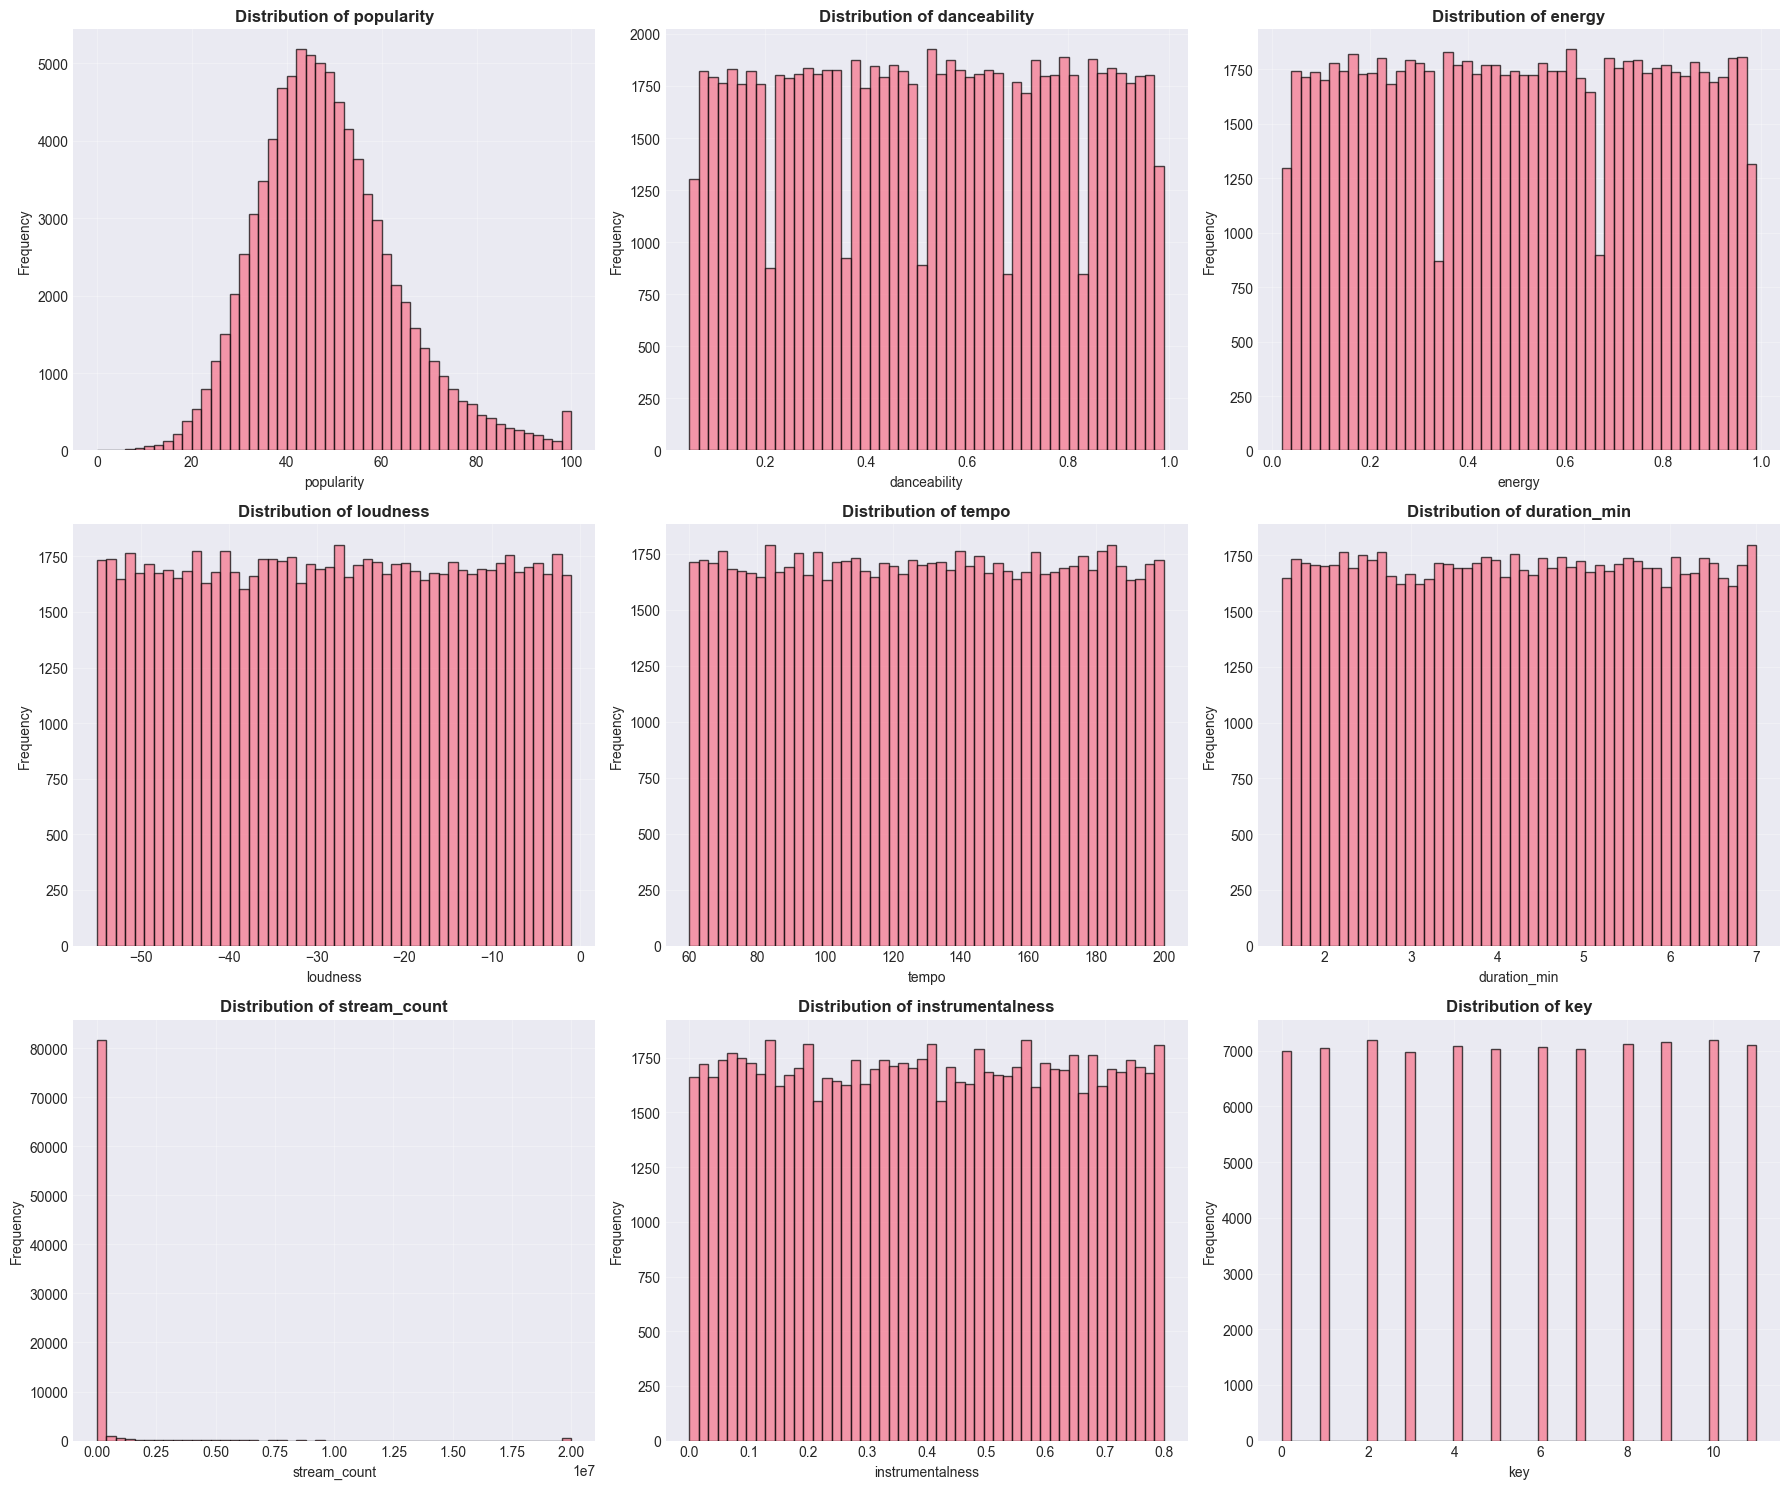

In [82]:
# Distribution of numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

numerical_features = ['popularity', 'danceability', 'energy', 'loudness', 
                     'tempo', 'duration_min', 'stream_count', 'instrumentalness', 'key']

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df_clean[feature].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

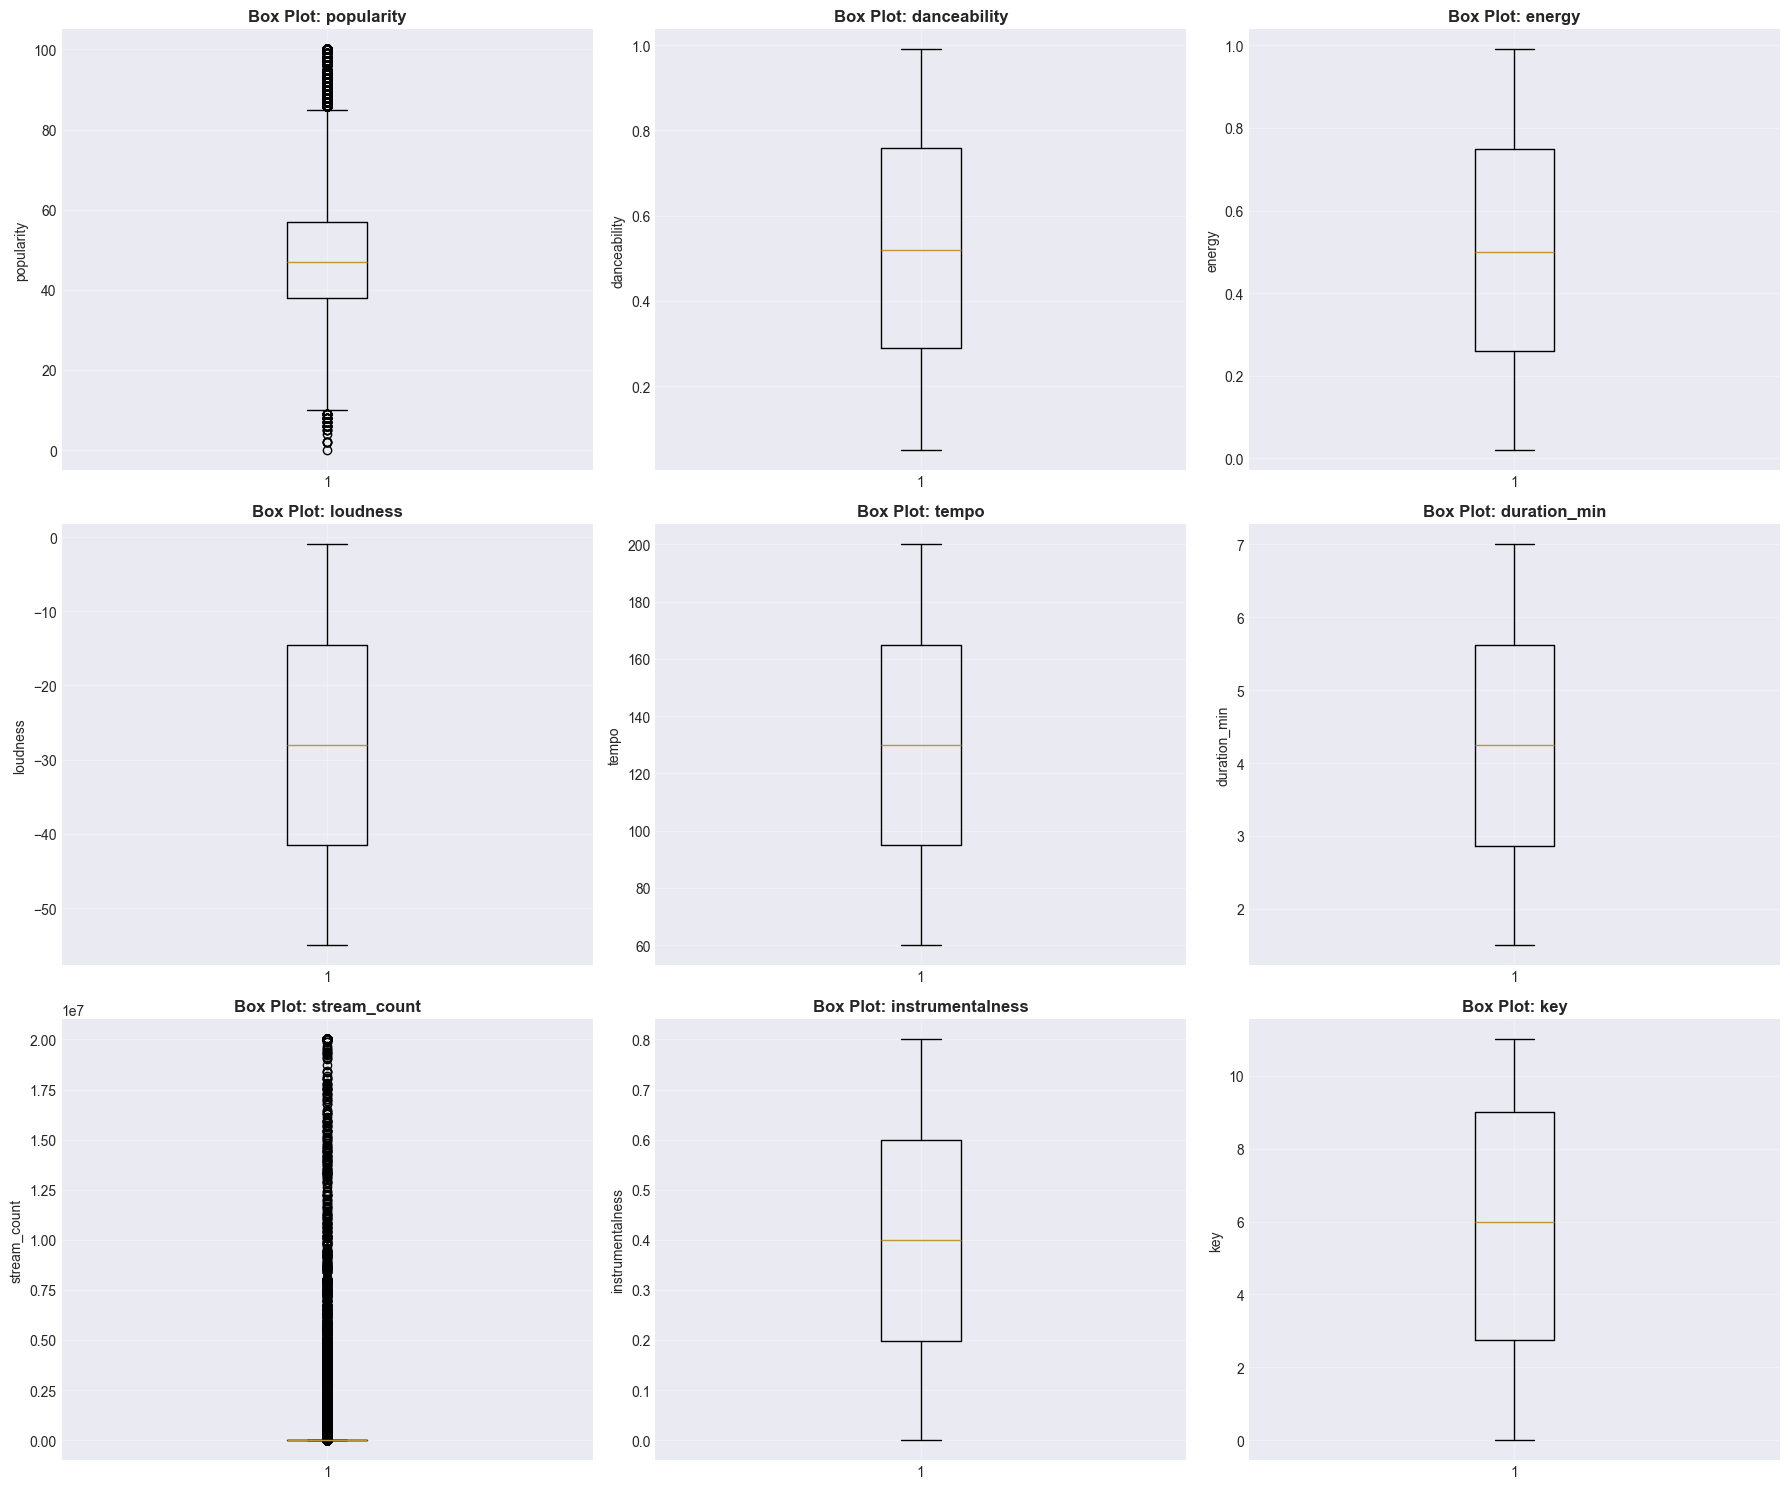

In [83]:
# Box plots for numerical features to identify outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    axes[idx].boxplot(df_clean[feature].dropna(), vert=True)
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

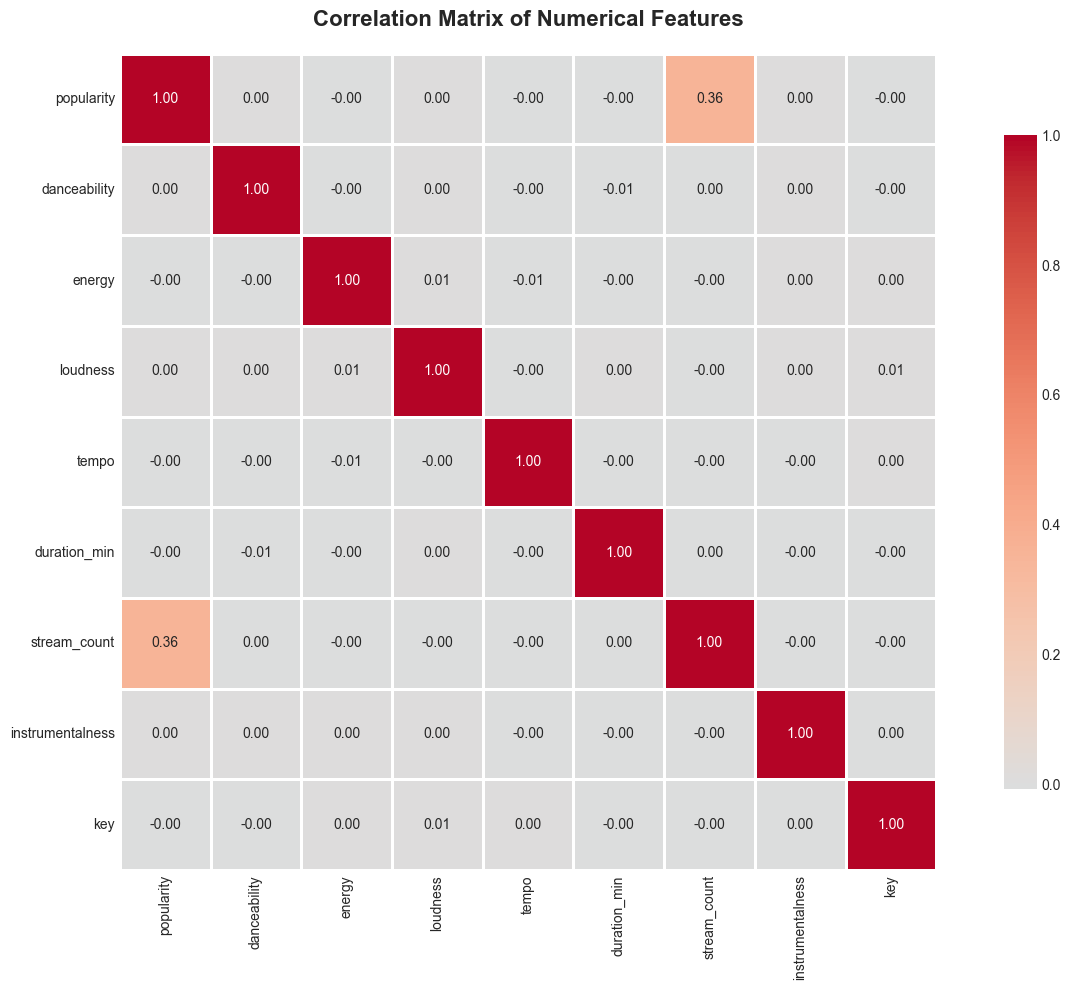

In [84]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

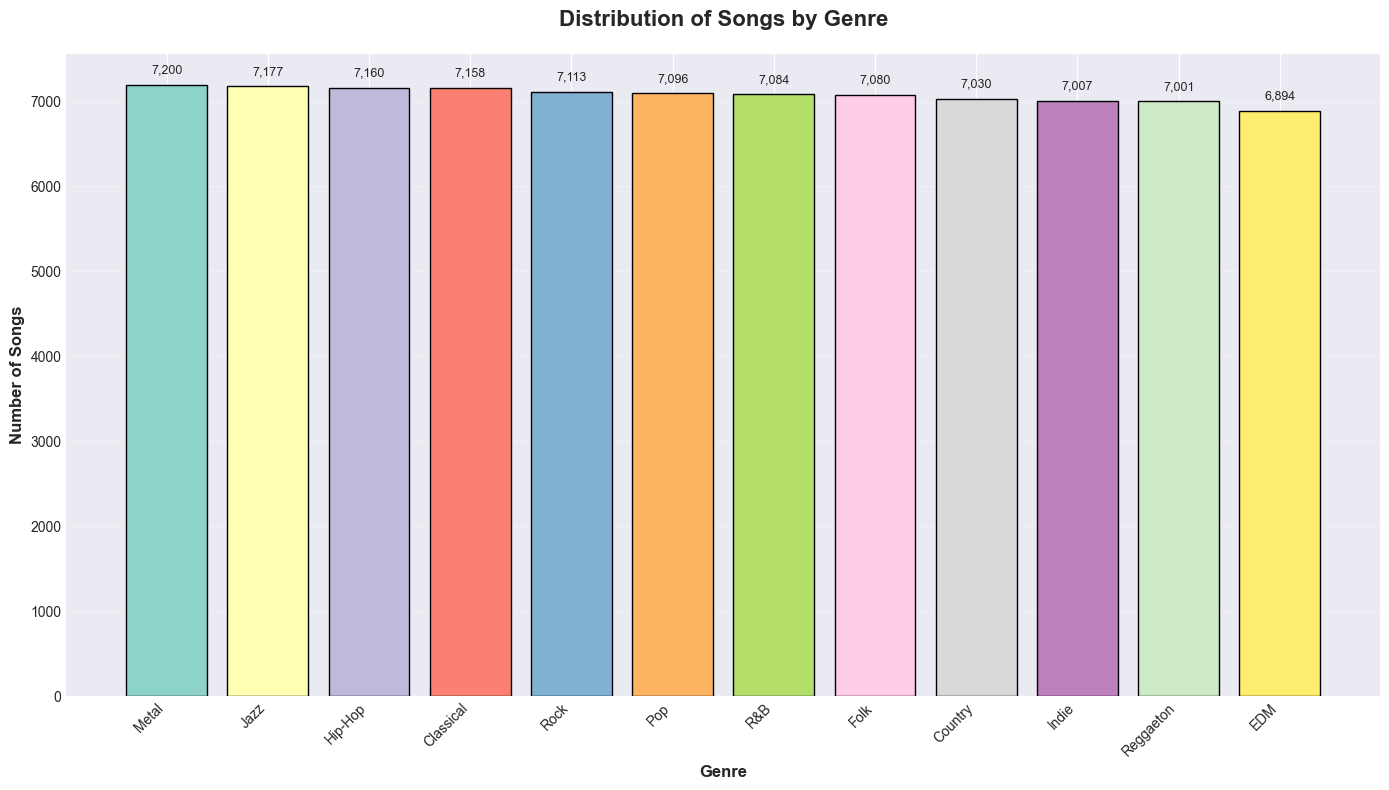


Total genres: 12

Top 5 genres:
genre
Metal        7200
Jazz         7177
Hip-Hop      7160
Classical    7158
Rock         7113
Name: count, dtype: int64


In [85]:
# Genre distribution
plt.figure(figsize=(14, 8))
genre_counts = df_clean['genre'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))
bars = plt.bar(range(len(genre_counts)), genre_counts.values, color=colors, edgecolor='black')
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Distribution of Songs by Genre', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, genre_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nTotal genres: {df_clean['genre'].nunique()}")
print(f"\nTop 5 genres:")
print(genre_counts.head())

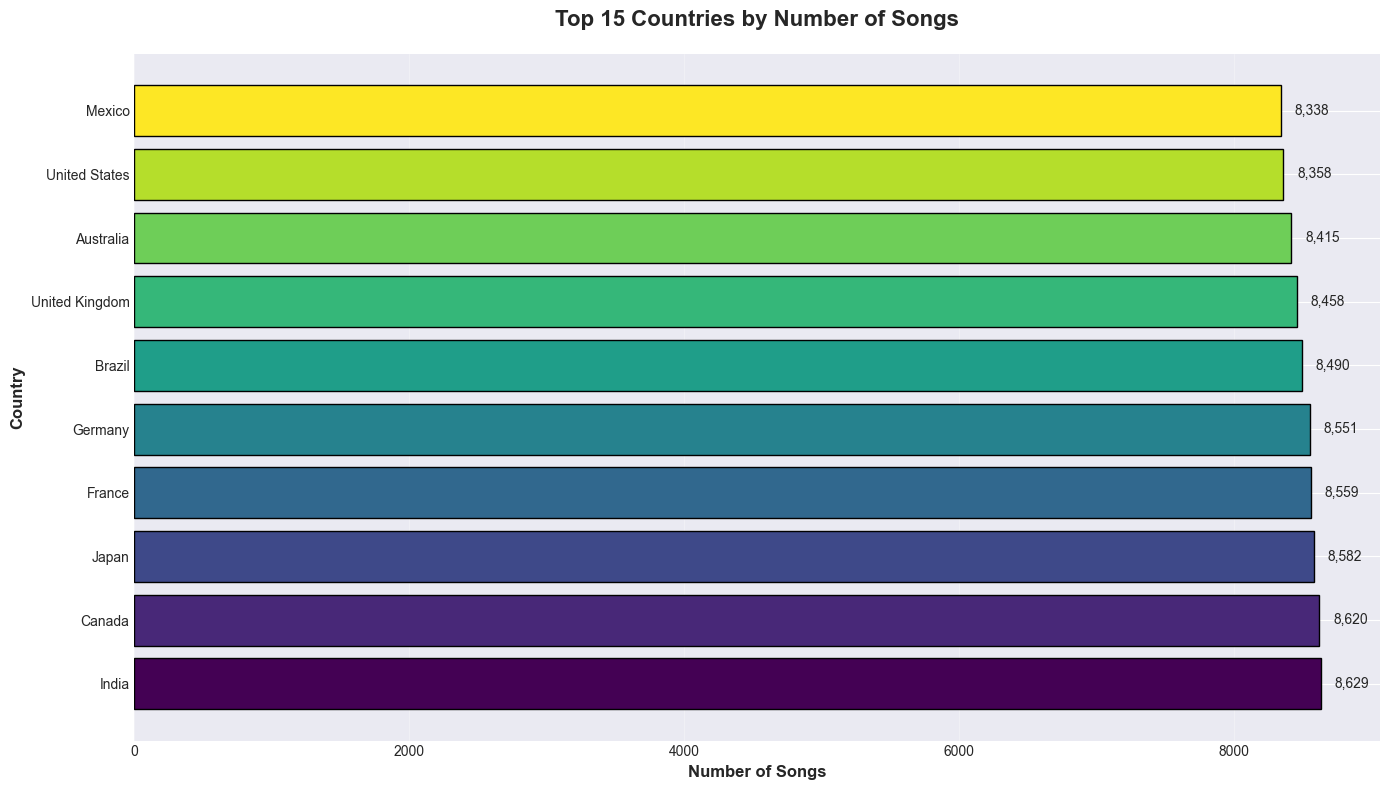

In [86]:
# Country distribution
plt.figure(figsize=(14, 8))
country_counts = df_clean['country'].value_counts().head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(country_counts)))
bars = plt.barh(range(len(country_counts)), country_counts.values, color=colors, edgecolor='black')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.xlabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Top 15 Countries by Number of Songs', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(country_counts)), country_counts.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, country_counts.values)):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{count:,}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

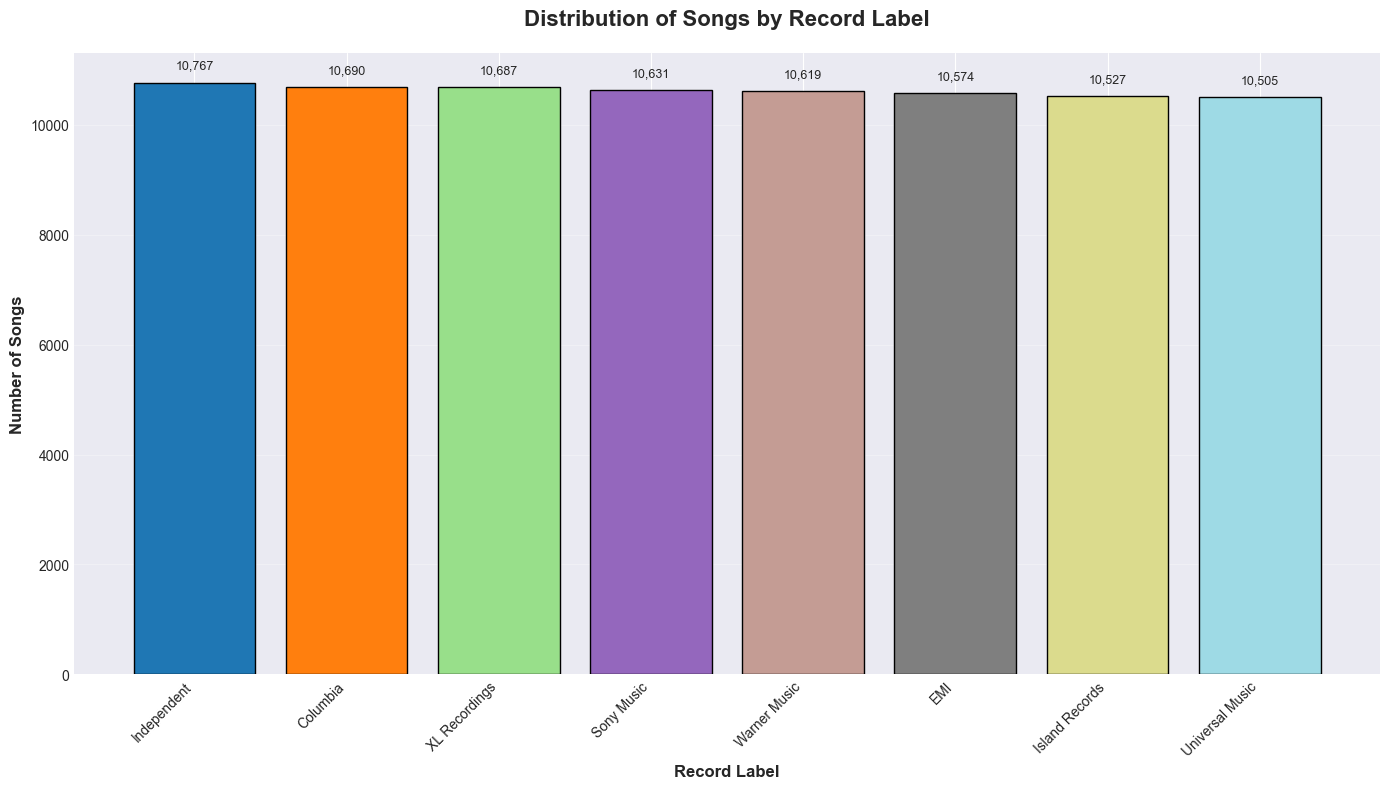

In [87]:
# Label (Record Label) distribution
plt.figure(figsize=(14, 8))
label_counts = df_clean['label'].value_counts()
colors = plt.cm.tab20(np.linspace(0, 1, len(label_counts)))
bars = plt.bar(range(len(label_counts)), label_counts.values, color=colors, edgecolor='black')
plt.xlabel('Record Label', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Distribution of Songs by Record Label', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(label_counts)), label_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, label_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

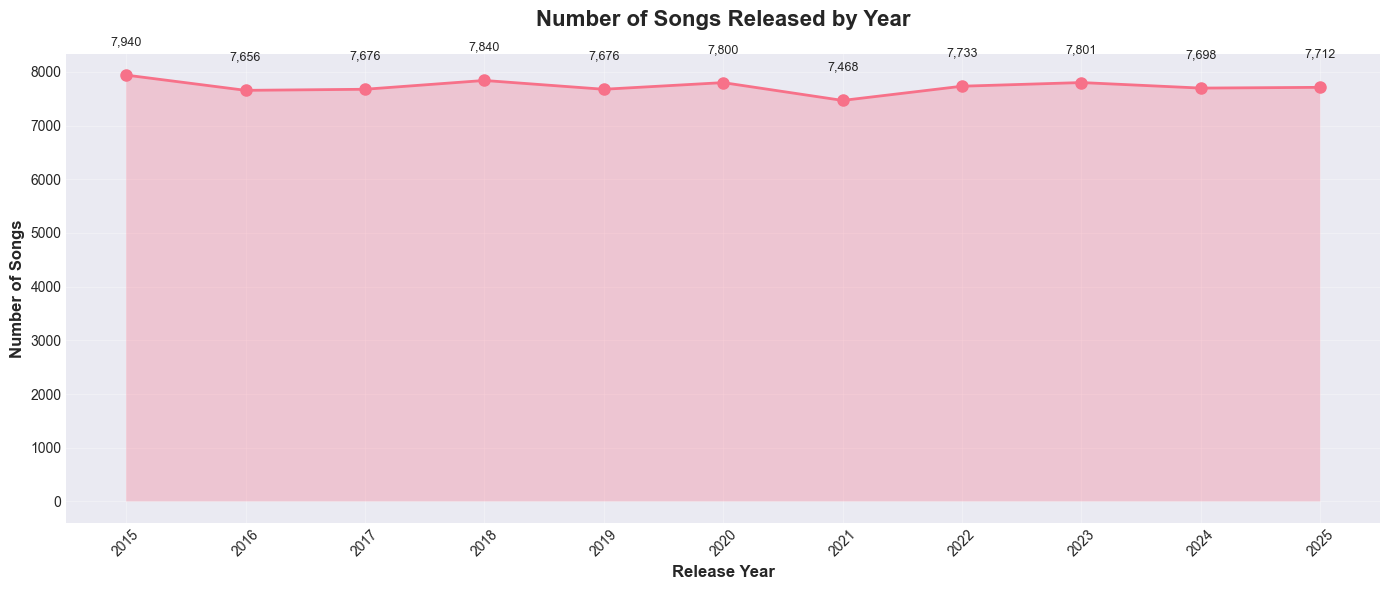

In [88]:
# Songs released by year
plt.figure(figsize=(14, 6))
year_counts = df_clean['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8)
plt.fill_between(year_counts.index, year_counts.values, alpha=0.3)
plt.xlabel('Release Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Number of Songs Released by Year', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.xticks(year_counts.index, rotation=45)

# Add value labels on points
for year, count in year_counts.items():
    plt.text(year, count + 500, f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

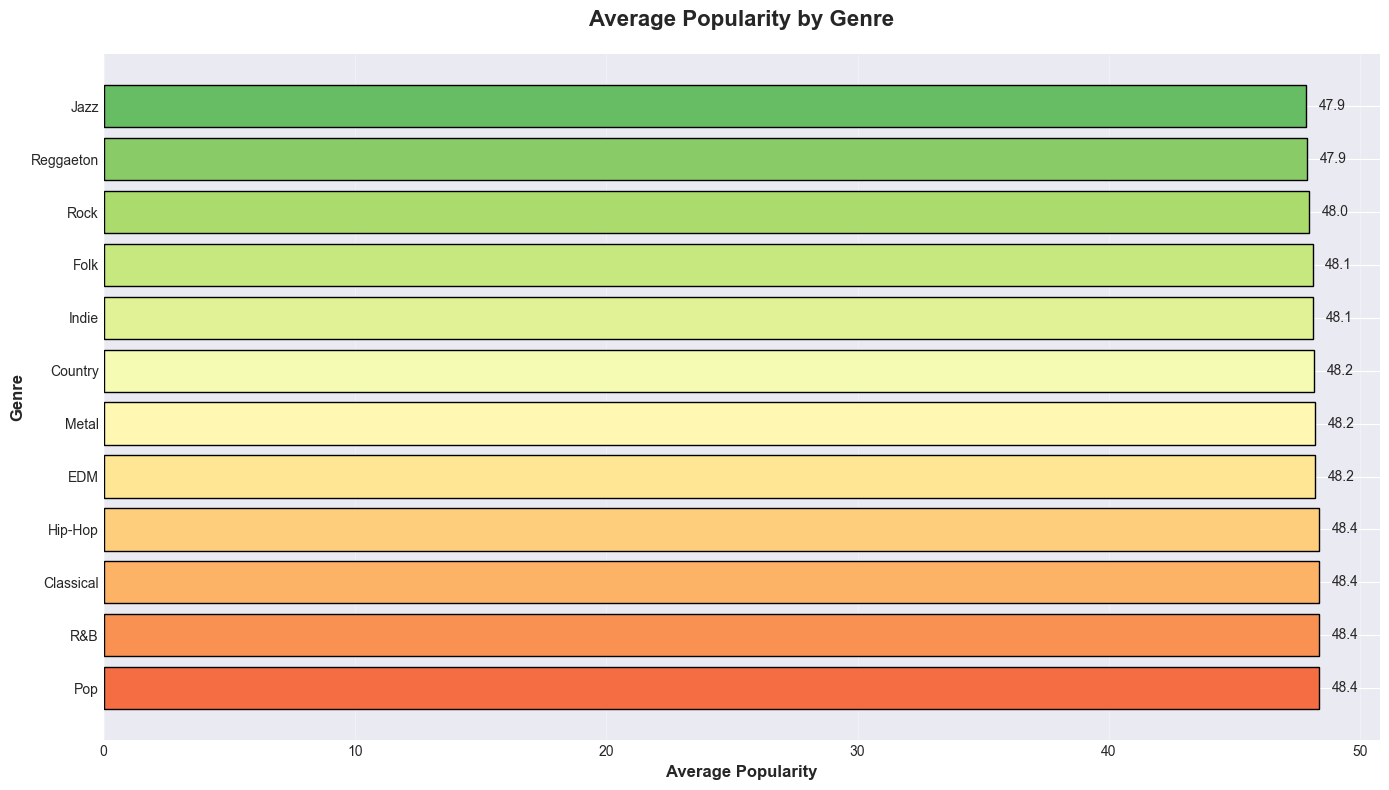

In [89]:
# Popularity distribution by genre
plt.figure(figsize=(14, 8))
genre_popularity = df_clean.groupby('genre')['popularity'].mean().sort_values(ascending=False)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(genre_popularity)))
bars = plt.barh(range(len(genre_popularity)), genre_popularity.values, color=colors, edgecolor='black')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12, fontweight='bold')
plt.title('Average Popularity by Genre', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(genre_popularity)), genre_popularity.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, genre_popularity.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

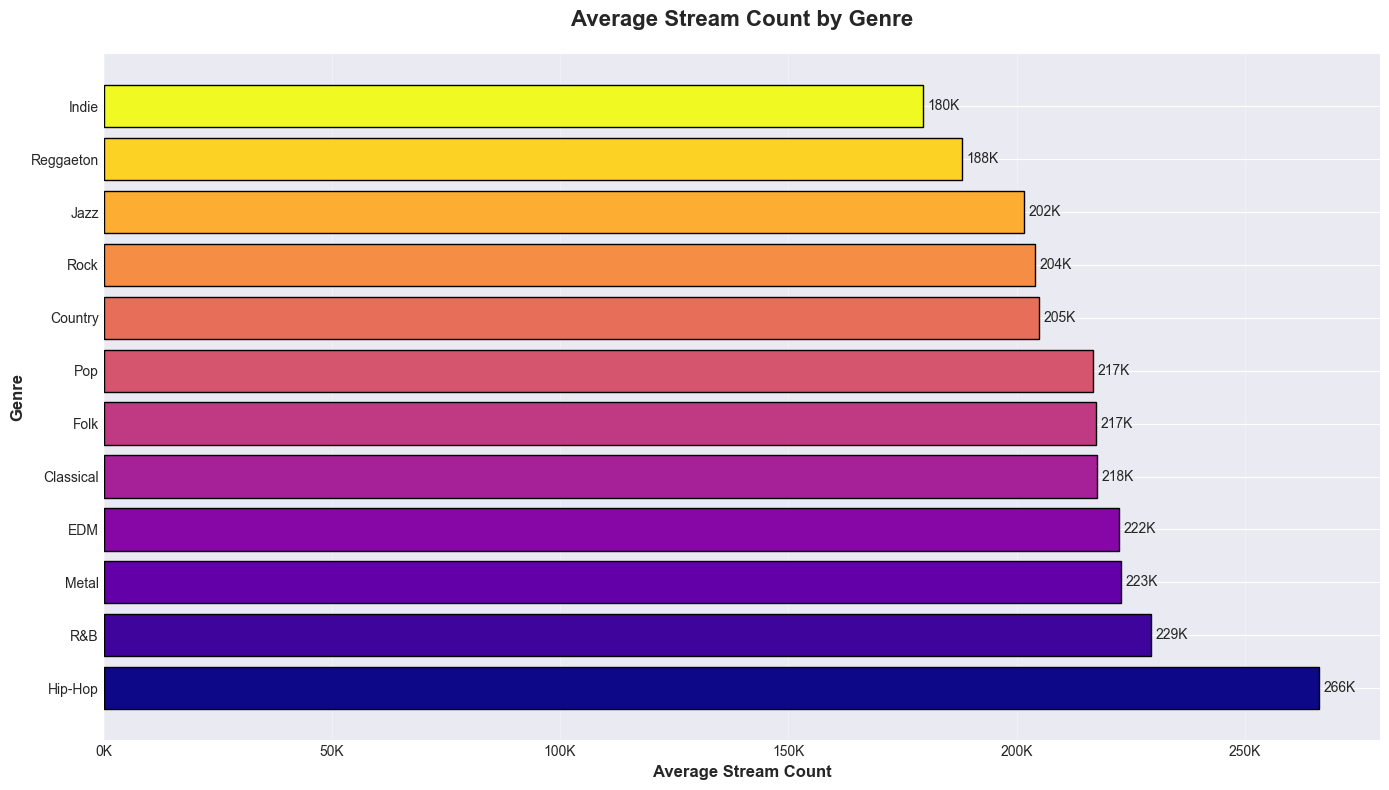

In [90]:
# Stream count distribution by genre
plt.figure(figsize=(14, 8))
genre_streams = df_clean.groupby('genre')['stream_count'].mean().sort_values(ascending=False)
colors = plt.cm.plasma(np.linspace(0, 1, len(genre_streams)))
bars = plt.barh(range(len(genre_streams)), genre_streams.values, color=colors, edgecolor='black')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.xlabel('Average Stream Count', fontsize=12, fontweight='bold')
plt.title('Average Stream Count by Genre', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(genre_streams)), genre_streams.index)
plt.grid(axis='x', alpha=0.3)

# Format x-axis to show values in thousands/millions
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

# Add value labels
for i, (bar, val) in enumerate(zip(bars, genre_streams.values)):
    label = f'{val/1000:.0f}K' if val < 1000000 else f'{val/1000000:.1f}M'
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             label, ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

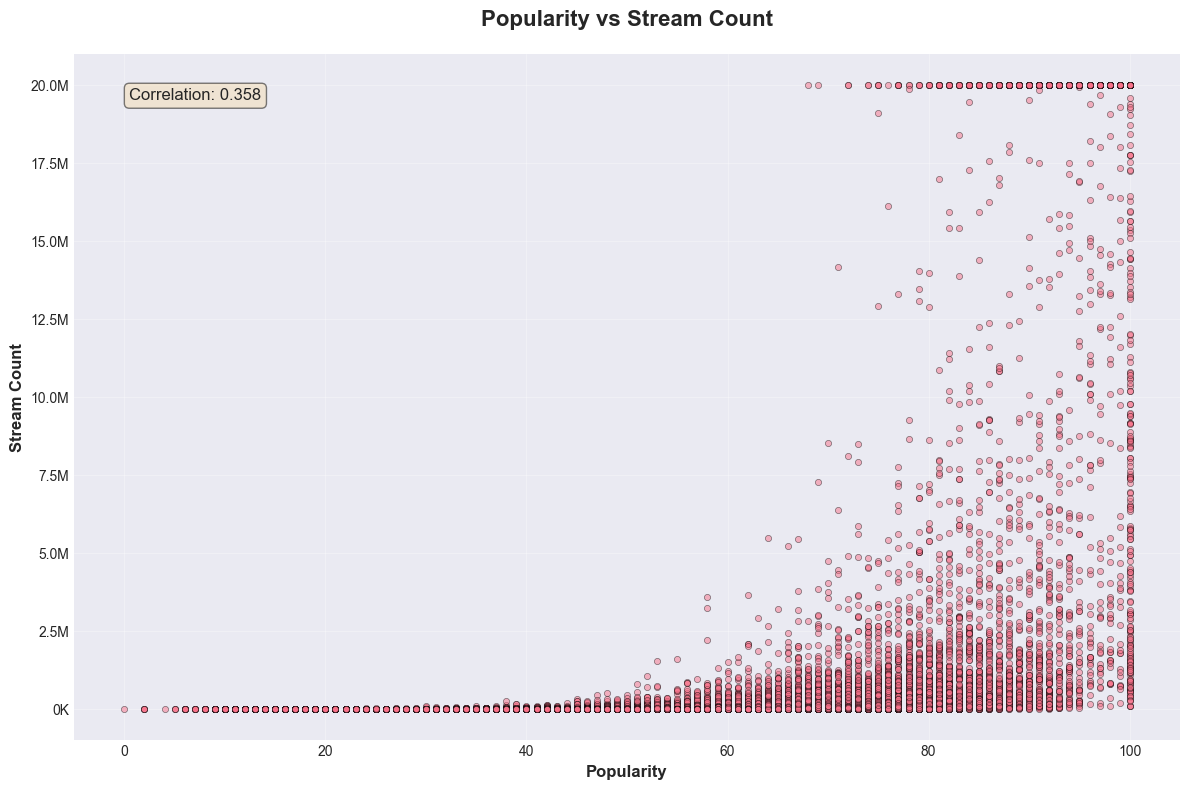

In [91]:
# Relationship between popularity and stream_count
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['popularity'], df_clean['stream_count'], alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
plt.xlabel('Popularity', fontsize=12, fontweight='bold')
plt.ylabel('Stream Count', fontsize=12, fontweight='bold')
plt.title('Popularity vs Stream Count', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['popularity'].corr(df_clean['stream_count'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x < 1000000 else f'{x/1000000:.1f}M'))

plt.tight_layout()
plt.show()

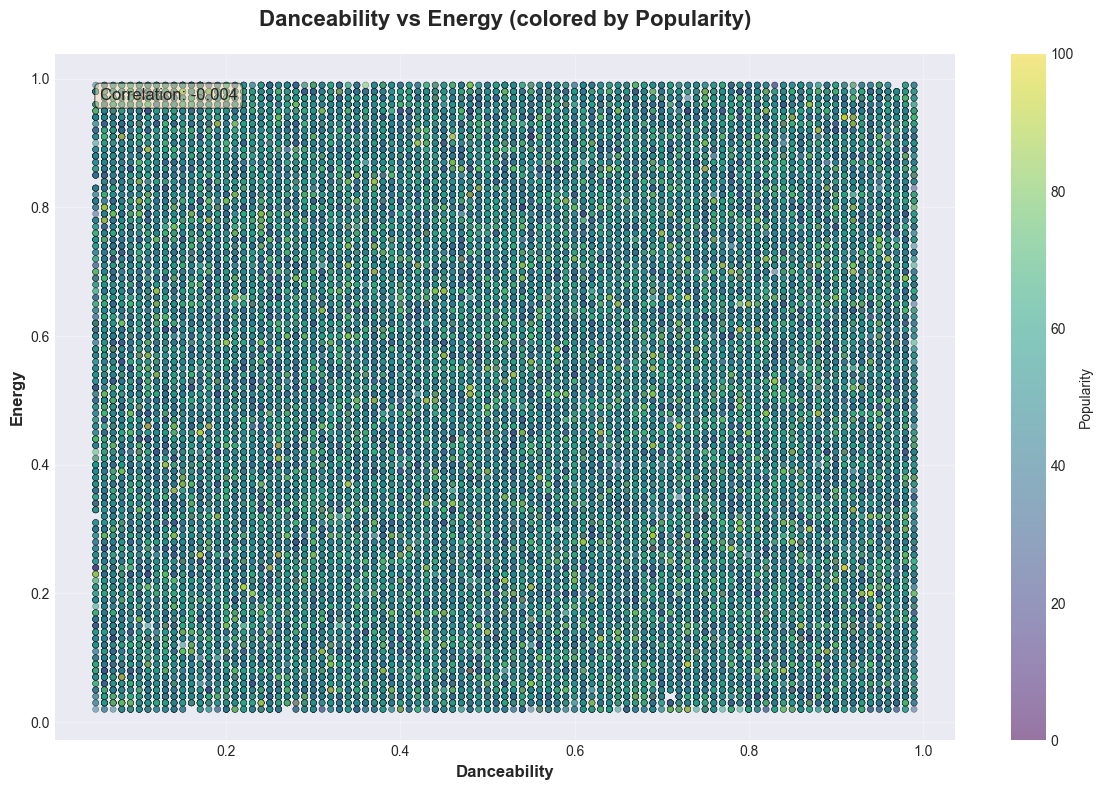

In [92]:
# Relationship between danceability and energy
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['danceability'], df_clean['energy'], alpha=0.5, s=20, 
            c=df_clean['popularity'], cmap='viridis', edgecolors='black', linewidth=0.3)
plt.colorbar(label='Popularity')
plt.xlabel('Danceability', fontsize=12, fontweight='bold')
plt.ylabel('Energy', fontsize=12, fontweight='bold')
plt.title('Danceability vs Energy (colored by Popularity)', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = df_clean['danceability'].corr(df_clean['energy'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

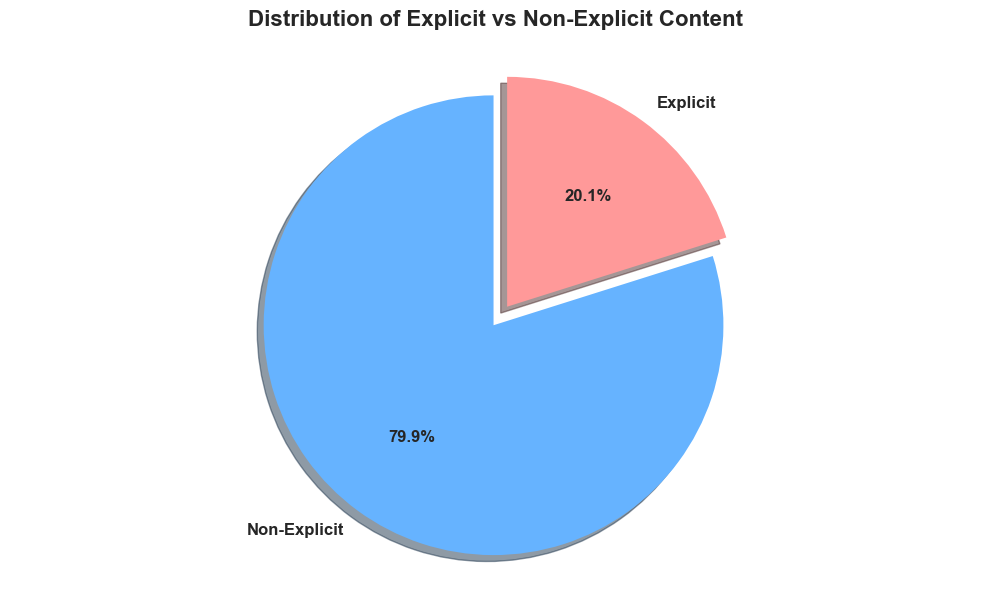


Explicit songs: 17,113 (20.13%)
Non-explicit songs: 67,887 (79.87%)


In [93]:
# Explicit content analysis
plt.figure(figsize=(10, 6))
explicit_counts = df_clean['explicit'].value_counts()
labels = ['Non-Explicit', 'Explicit']
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.05)

plt.pie(explicit_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Explicit vs Non-Explicit Content', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nExplicit songs: {explicit_counts[1]:,} ({(explicit_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Non-explicit songs: {explicit_counts[0]:,} ({(explicit_counts[0]/len(df_clean)*100):.2f}%)")

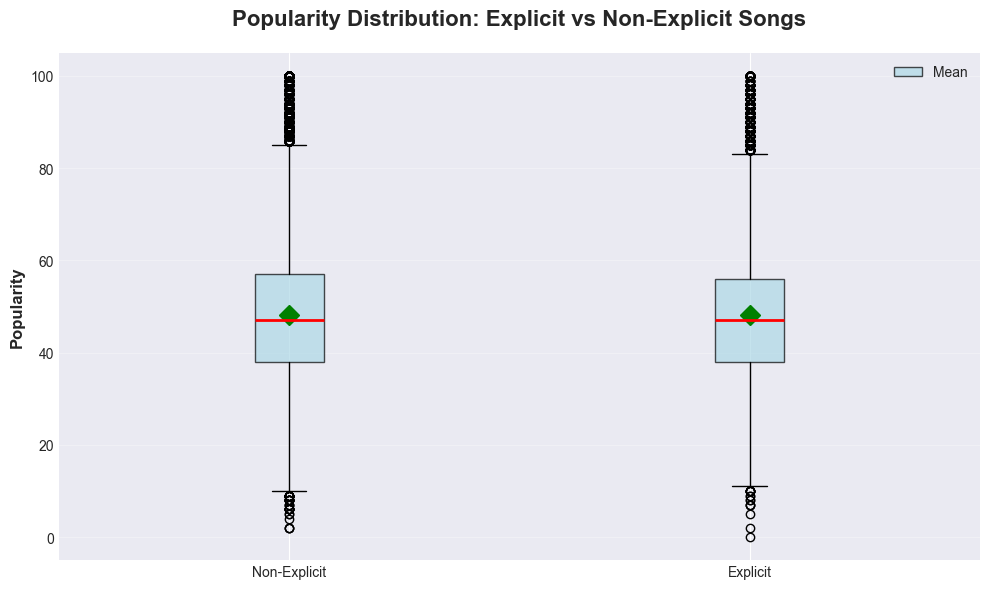


T-test results:
T-statistic: -0.2634
P-value: 0.7923
Mean explicit: 48.14
Mean non-explicit: 48.17


In [94]:
# Popularity comparison: Explicit vs Non-Explicit
plt.figure(figsize=(10, 6))
explicit_pop = df_clean[df_clean['explicit'] == 1]['popularity']
non_explicit_pop = df_clean[df_clean['explicit'] == 0]['popularity']

data_to_plot = [non_explicit_pop, explicit_pop]
labels = ['Non-Explicit', 'Explicit']

bp = plt.boxplot(data_to_plot, labels=labels, patch_artist=True, 
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2))

plt.ylabel('Popularity', fontsize=12, fontweight='bold')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Songs', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Add mean markers
for i, data in enumerate(data_to_plot):
    mean_val = data.mean()
    plt.plot(i+1, mean_val, 'D', color='green', markersize=10, label='Mean' if i == 0 else '')

plt.legend(['Mean'])
plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(explicit_pop, non_explicit_pop)
print(f"\nT-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean explicit: {explicit_pop.mean():.2f}")
print(f"Mean non-explicit: {non_explicit_pop.mean():.2f}")

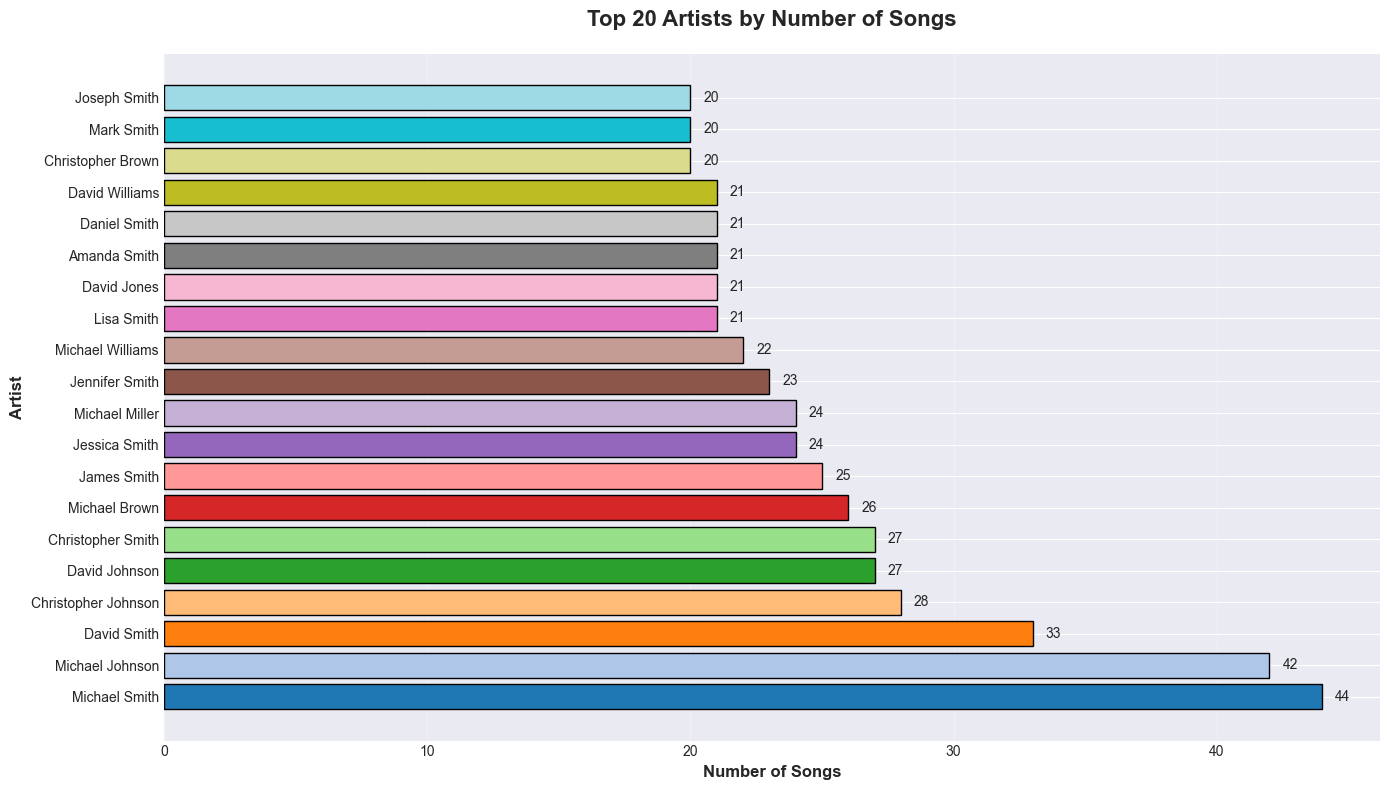

In [95]:
# Top artists by number of songs
plt.figure(figsize=(14, 8))
top_artists = df_clean['artist_name'].value_counts().head(20)
colors = plt.cm.tab20(np.linspace(0, 1, len(top_artists)))
bars = plt.barh(range(len(top_artists)), top_artists.values, color=colors, edgecolor='black')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.xlabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Top 20 Artists by Number of Songs', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(top_artists)), top_artists.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_artists.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{count}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

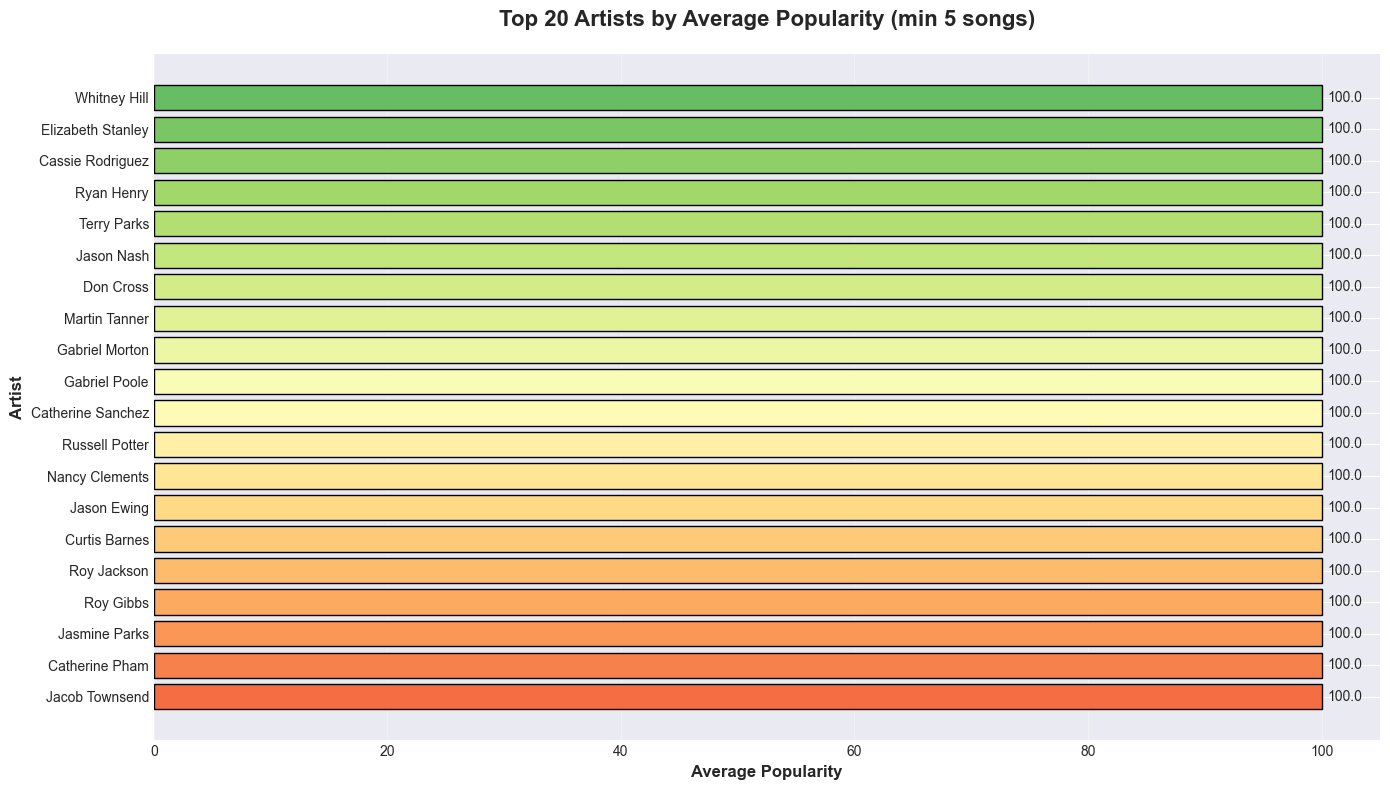

In [96]:
# Top artists by average popularity
plt.figure(figsize=(14, 8))
artist_popularity = df_clean.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(20)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(artist_popularity)))
bars = plt.barh(range(len(artist_popularity)), artist_popularity.values, color=colors, edgecolor='black')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12, fontweight='bold')
plt.title('Top 20 Artists by Average Popularity (min 5 songs)', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(artist_popularity)), artist_popularity.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, artist_popularity.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

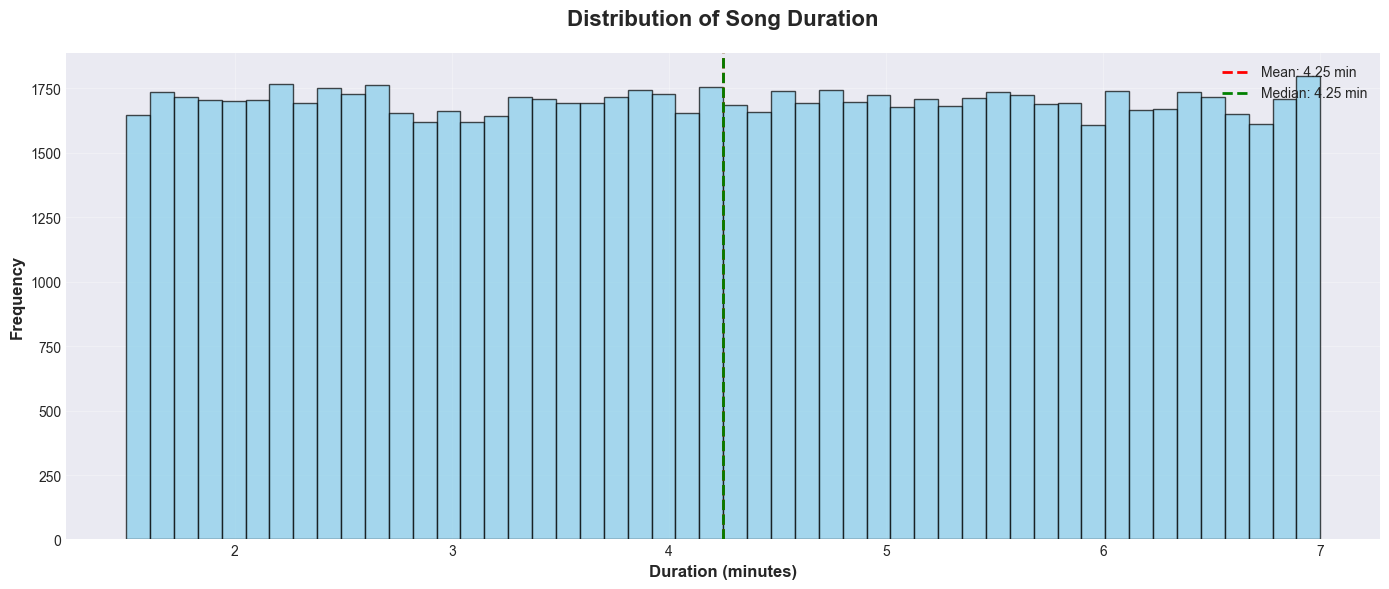


Duration Statistics:
Mean: 4.25 minutes
Median: 4.25 minutes
Min: 1.50 minutes
Max: 7.00 minutes


In [97]:
# Duration analysis
plt.figure(figsize=(14, 6))
plt.hist(df_clean['duration_min'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(df_clean['duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["duration_min"].mean():.2f} min')
plt.axvline(df_clean['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["duration_min"].median():.2f} min')
plt.xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Song Duration', fontsize=16, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDuration Statistics:")
print(f"Mean: {df_clean['duration_min'].mean():.2f} minutes")
print(f"Median: {df_clean['duration_min'].median():.2f} minutes")
print(f"Min: {df_clean['duration_min'].min():.2f} minutes")
print(f"Max: {df_clean['duration_min'].max():.2f} minutes")

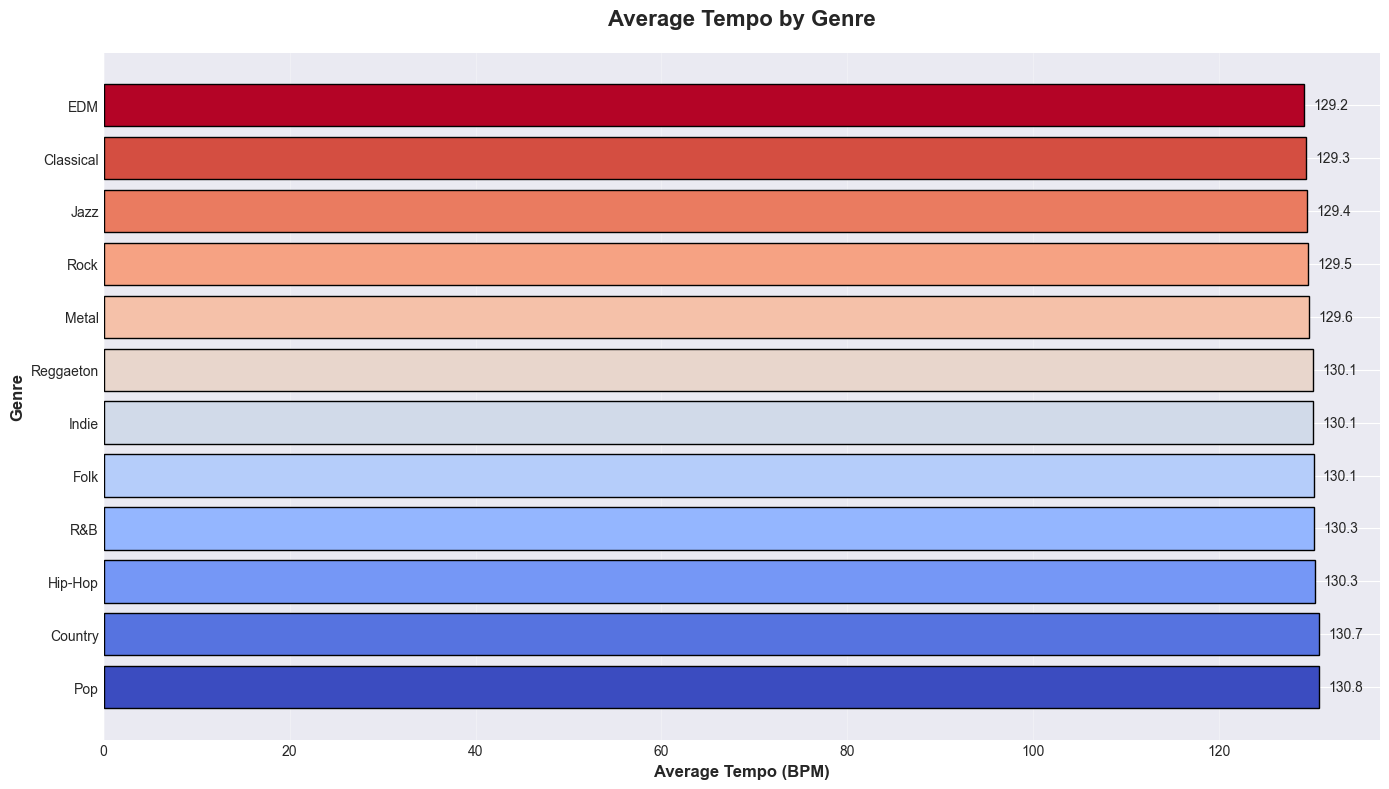

In [98]:
# Tempo analysis by genre
plt.figure(figsize=(14, 8))
genre_tempo = df_clean.groupby('genre')['tempo'].mean().sort_values(ascending=False)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(genre_tempo)))
bars = plt.barh(range(len(genre_tempo)), genre_tempo.values, color=colors, edgecolor='black')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.xlabel('Average Tempo (BPM)', fontsize=12, fontweight='bold')
plt.title('Average Tempo by Genre', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(genre_tempo)), genre_tempo.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, genre_tempo.values)):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

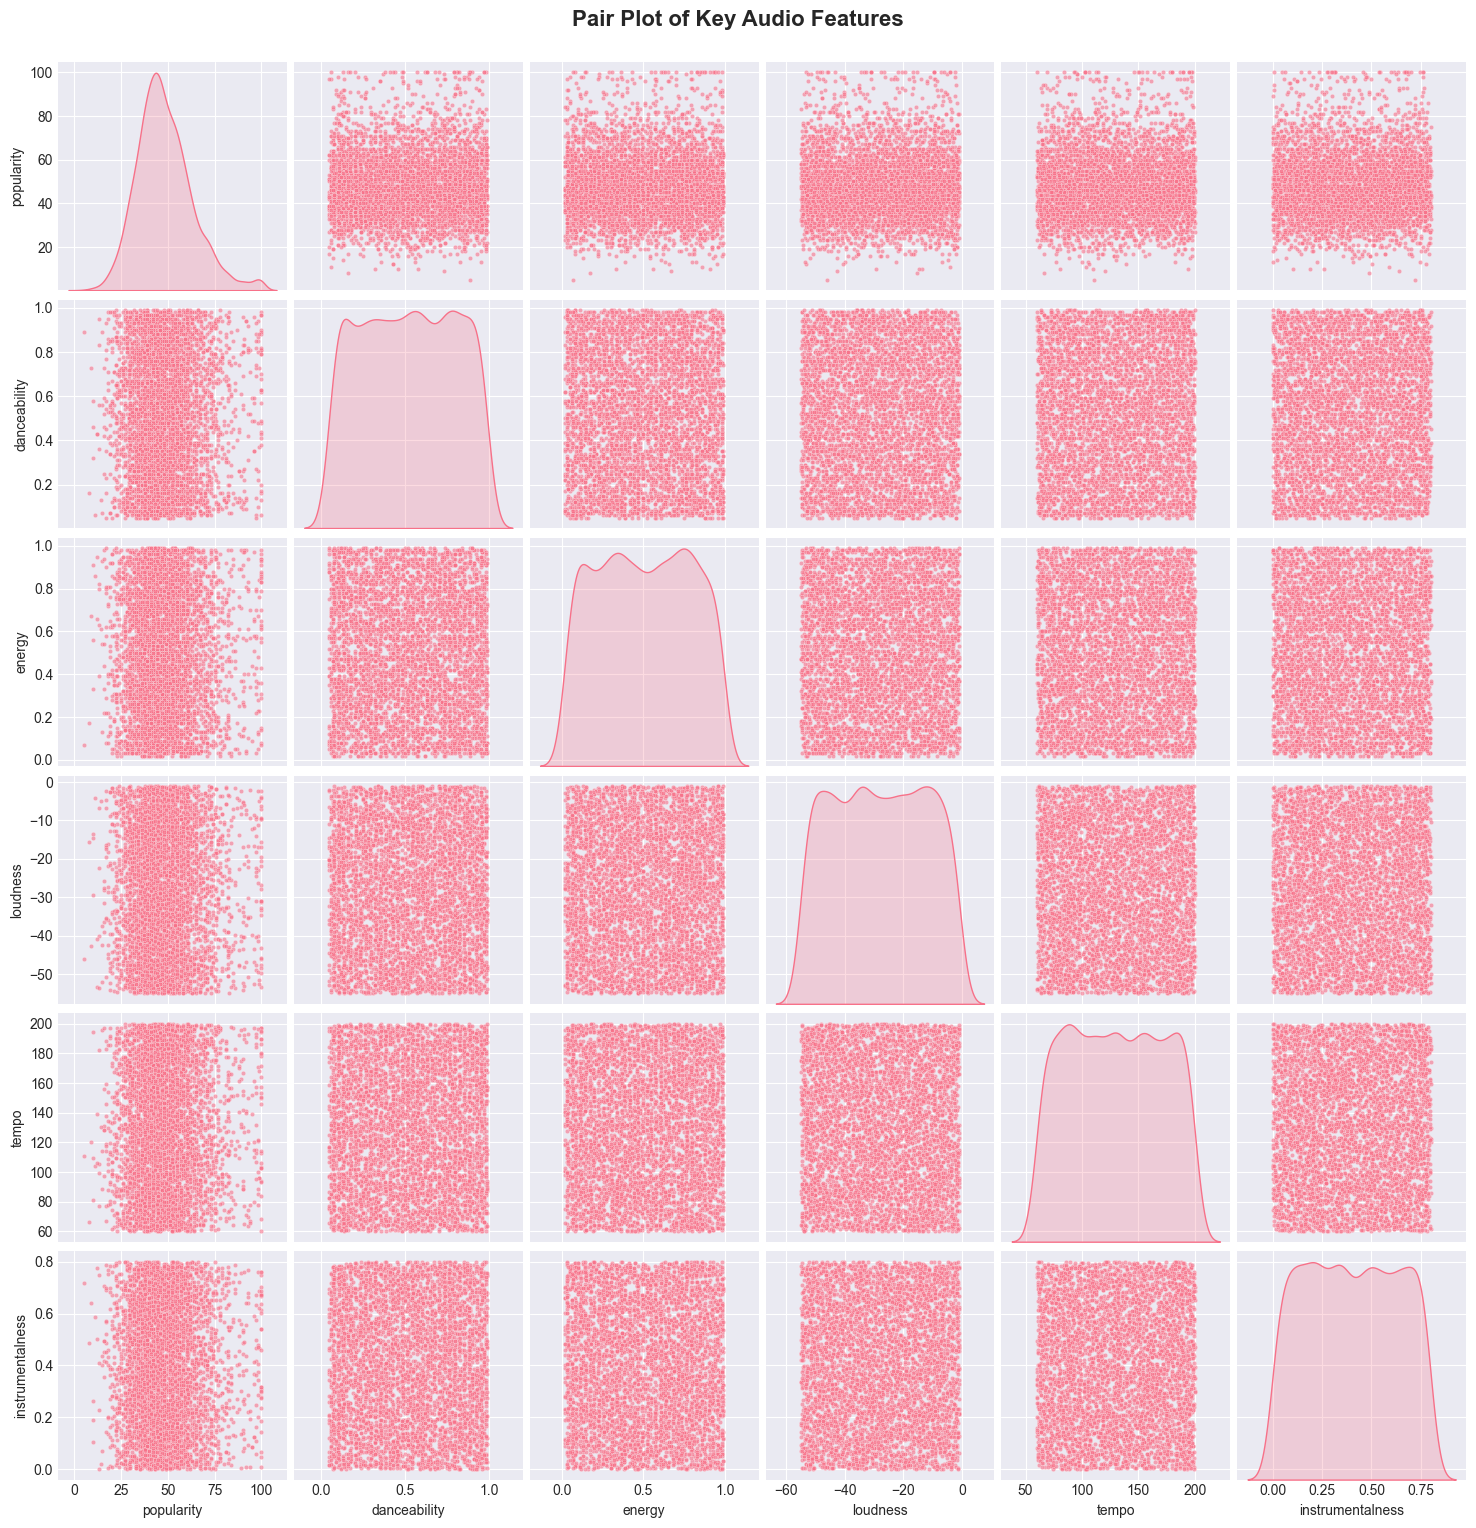

In [99]:
# Pair plot for key audio features
key_features = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
sample_df = df_clean[key_features].sample(n=5000, random_state=42)  # Sample for performance

g = sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10})
g.fig.suptitle('Pair Plot of Key Audio Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()

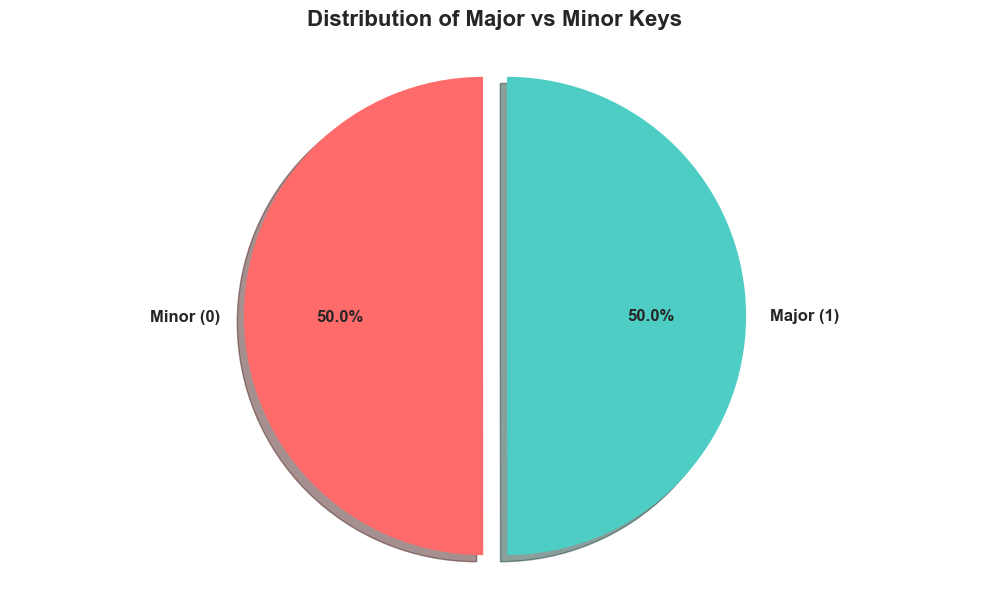


Major key songs: 42,512 (50.01%)
Minor key songs: 42,488 (49.99%)


In [100]:
# Mode distribution (Major vs Minor)
plt.figure(figsize=(10, 6))
mode_counts = df_clean['mode'].value_counts()
labels = ['Minor (0)', 'Major (1)']
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.05, 0.05)

plt.pie(mode_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90,
        textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Major vs Minor Keys', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nMajor key songs: {mode_counts[1]:,} ({(mode_counts[1]/len(df_clean)*100):.2f}%)")
print(f"Minor key songs: {mode_counts[0]:,} ({(mode_counts[0]/len(df_clean)*100):.2f}%)")

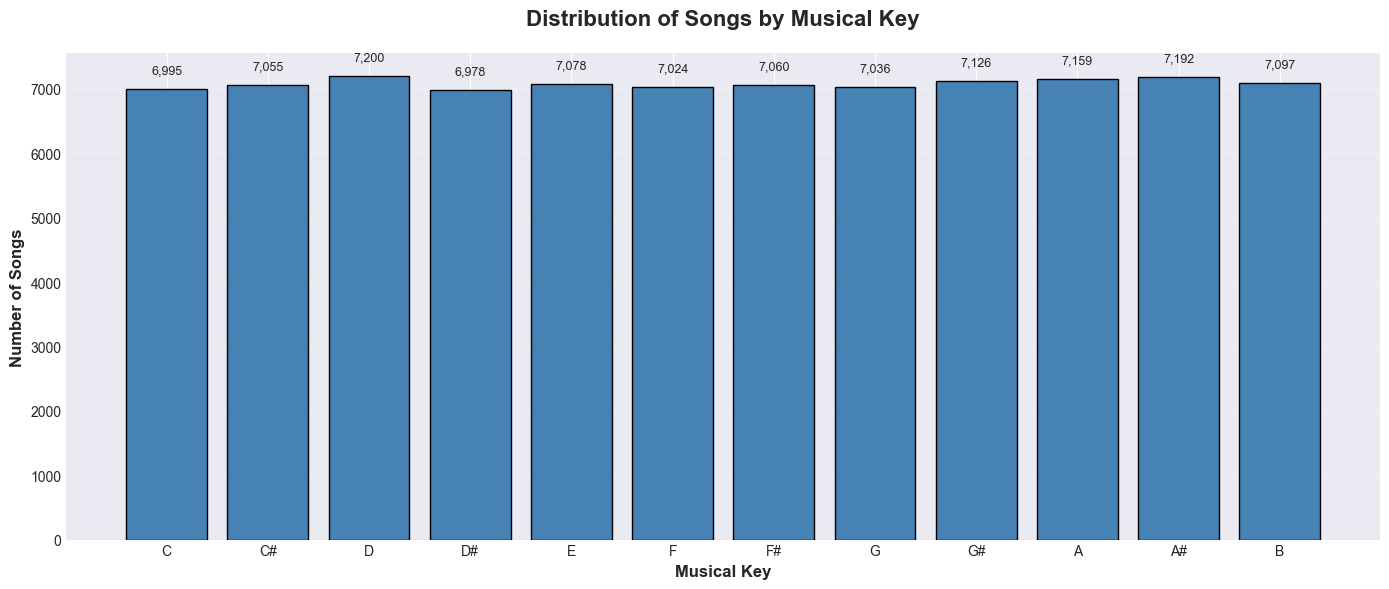

In [101]:
# Key distribution (musical keys 0-11)
plt.figure(figsize=(14, 6))
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_counts = df_clean['key'].value_counts().sort_index()
bars = plt.bar(range(len(key_counts)), key_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Musical Key', fontsize=12, fontweight='bold')
plt.ylabel('Number of Songs', fontsize=12, fontweight='bold')
plt.title('Distribution of Songs by Musical Key', fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(key_counts)), [key_names[i] for i in key_counts.index])
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, key_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# STATISTICAL ANALYSIS & INSIGHTS

In [102]:
# Statistical summary by genre
print("=" * 80)
print("STATISTICAL SUMMARY BY GENRE")
print("=" * 80)

stats_by_genre = df_clean.groupby('genre').agg({
    'popularity': ['mean', 'std', 'min', 'max'],
    'stream_count': ['mean', 'sum'],
    'danceability': 'mean',
    'energy': 'mean',
    'tempo': 'mean',
    'duration_min': 'mean'
}).round(2)

print(stats_by_genre)

STATISTICAL SUMMARY BY GENRE
          popularity                 stream_count             danceability  \
                mean    std min  max         mean         sum         mean   
genre                                                                        
Classical      48.36  14.83   8  100    217722.97  1558461000         0.52   
Country        48.17  14.85   6  100    204906.54  1440493000         0.53   
EDM            48.20  14.74   2  100    222381.20  1533096000         0.52   
Folk           48.10  14.97   6  100    217378.67  1539041000         0.52   
Hip-Hop        48.36  15.09   2  100    266307.54  1906762000         0.52   
Indie          48.12  14.58   5  100    179534.89  1258001000         0.52   
Jazz           47.85  14.64   6  100    201679.25  1447452000         0.52   
Metal          48.19  14.75   0  100    222916.39  1604998000         0.52   
Pop            48.37  15.00   7  100    216763.11  1538151000         0.52   
R&B            48.36  15.20   4  10

In [103]:
# Top songs by popularity
print("=" * 80)
print("TOP 10 SONGS BY POPULARITY")
print("=" * 80)
top_songs = df_clean.nlargest(10, 'popularity')[['track_name', 'artist_name', 'genre', 
                                                   'popularity', 'stream_count', 'danceability', 'energy']]
print(top_songs.to_string(index=False))

TOP 10 SONGS BY POPULARITY
                    track_name       artist_name     genre  popularity  stream_count  danceability  energy
   Good anything manager think     Julie Herrera   Hip-Hop         100      20000000          0.97    0.47
            Finally easy exist   Bonnie Roberson      Jazz         100       6555000          0.32    0.26
       Outside former official       Lisa Barnes     Metal         100      19380000          0.97    0.77
                            Of       David Rivas      Rock         100      20000000          0.17    0.22
                         Space     Joseph Duncan   Hip-Hop         100      20000000          0.13    0.07
                          Upon        Monica Kim       R&B         100      20000000          0.66    0.04
                Summer such PM     Brenda Wilson Classical         100      20000000          0.68    0.88
                  Although him   Samuel Cantrell Classical         100       1296000          0.67    0.12
          

In [104]:
# Top songs by stream count
print("=" * 80)
print("TOP 10 SONGS BY STREAM COUNT")
print("=" * 80)
top_streams = df_clean.nlargest(10, 'stream_count')[['track_name', 'artist_name', 'genre', 
                                                       'popularity', 'stream_count', 'danceability', 'energy']]
print(top_streams.to_string(index=False))

TOP 10 SONGS BY STREAM COUNT
                 track_name        artist_name     genre  popularity  stream_count  danceability  energy
Good anything manager think      Julie Herrera   Hip-Hop         100      20000000          0.97    0.47
                         Of        David Rivas      Rock         100      20000000          0.17    0.22
                      Throw      Brian Nichols       EDM          93      20000000          0.37    0.97
                      Space      Joseph Duncan   Hip-Hop         100      20000000          0.13    0.07
                       Upon         Monica Kim       R&B         100      20000000          0.66    0.04
     Team condition when if Roberto Williamson      Folk          75      20000000          0.45    0.80
              Leave outside      Kelsey Nguyen     Metal          89      20000000          0.60    0.21
            Admit why group    Justin Saunders     Metal          91      20000000          0.17    0.63
             Summer such P

In [105]:
# Analysis of audio features by genre
print("=" * 80)
print("AUDIO FEATURES ANALYSIS BY GENRE")
print("=" * 80)

audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'instrumentalness']
genre_audio = df_clean.groupby('genre')[audio_features].mean().round(3)

print("\nAverage Audio Features by Genre:")
print(genre_audio)

AUDIO FEATURES ANALYSIS BY GENRE

Average Audio Features by Genre:
           danceability  energy  loudness    tempo  instrumentalness
genre                                                               
Classical         0.520   0.508   -28.247  129.340             0.405
Country           0.526   0.505   -27.995  130.743             0.400
EDM               0.520   0.510   -27.829  129.174             0.401
Folk              0.518   0.505   -27.981  130.145             0.404
Hip-Hop           0.521   0.505   -28.054  130.267             0.395
Indie             0.521   0.510   -28.004  130.091             0.402
Jazz              0.519   0.498   -27.882  129.419             0.396
Metal             0.517   0.504   -27.846  129.626             0.398
Pop               0.519   0.503   -27.972  130.760             0.396
R&B               0.520   0.505   -28.094  130.250             0.405
Reggaeton         0.522   0.506   -27.942  130.052             0.401
Rock              0.526   0.506   -2

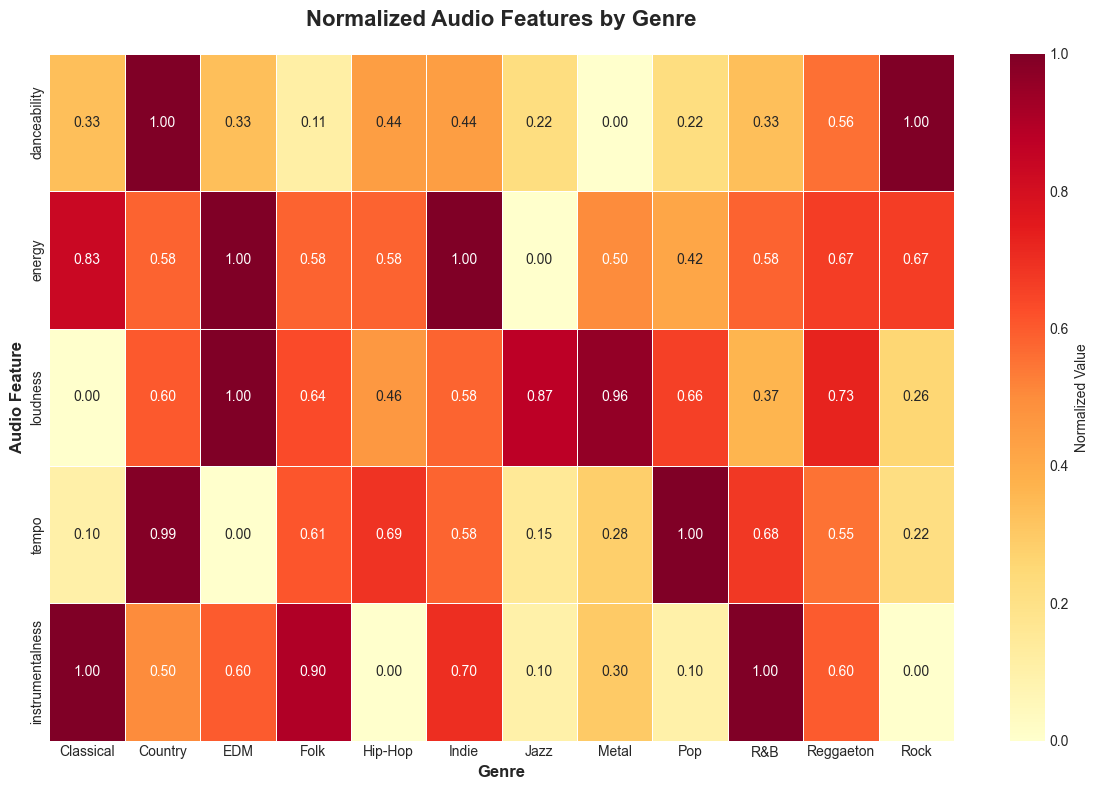

In [106]:
# Heatmap of audio features by genre
plt.figure(figsize=(12, 8))
genre_audio_normalized = genre_audio.copy()
# Normalize each feature to 0-1 scale for better visualization
for col in genre_audio_normalized.columns:
    genre_audio_normalized[col] = (genre_audio_normalized[col] - genre_audio_normalized[col].min()) / \
                                   (genre_audio_normalized[col].max() - genre_audio_normalized[col].min())

sns.heatmap(genre_audio_normalized.T, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Normalized Value'}, linewidths=0.5)
plt.title('Normalized Audio Features by Genre', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Audio Feature', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

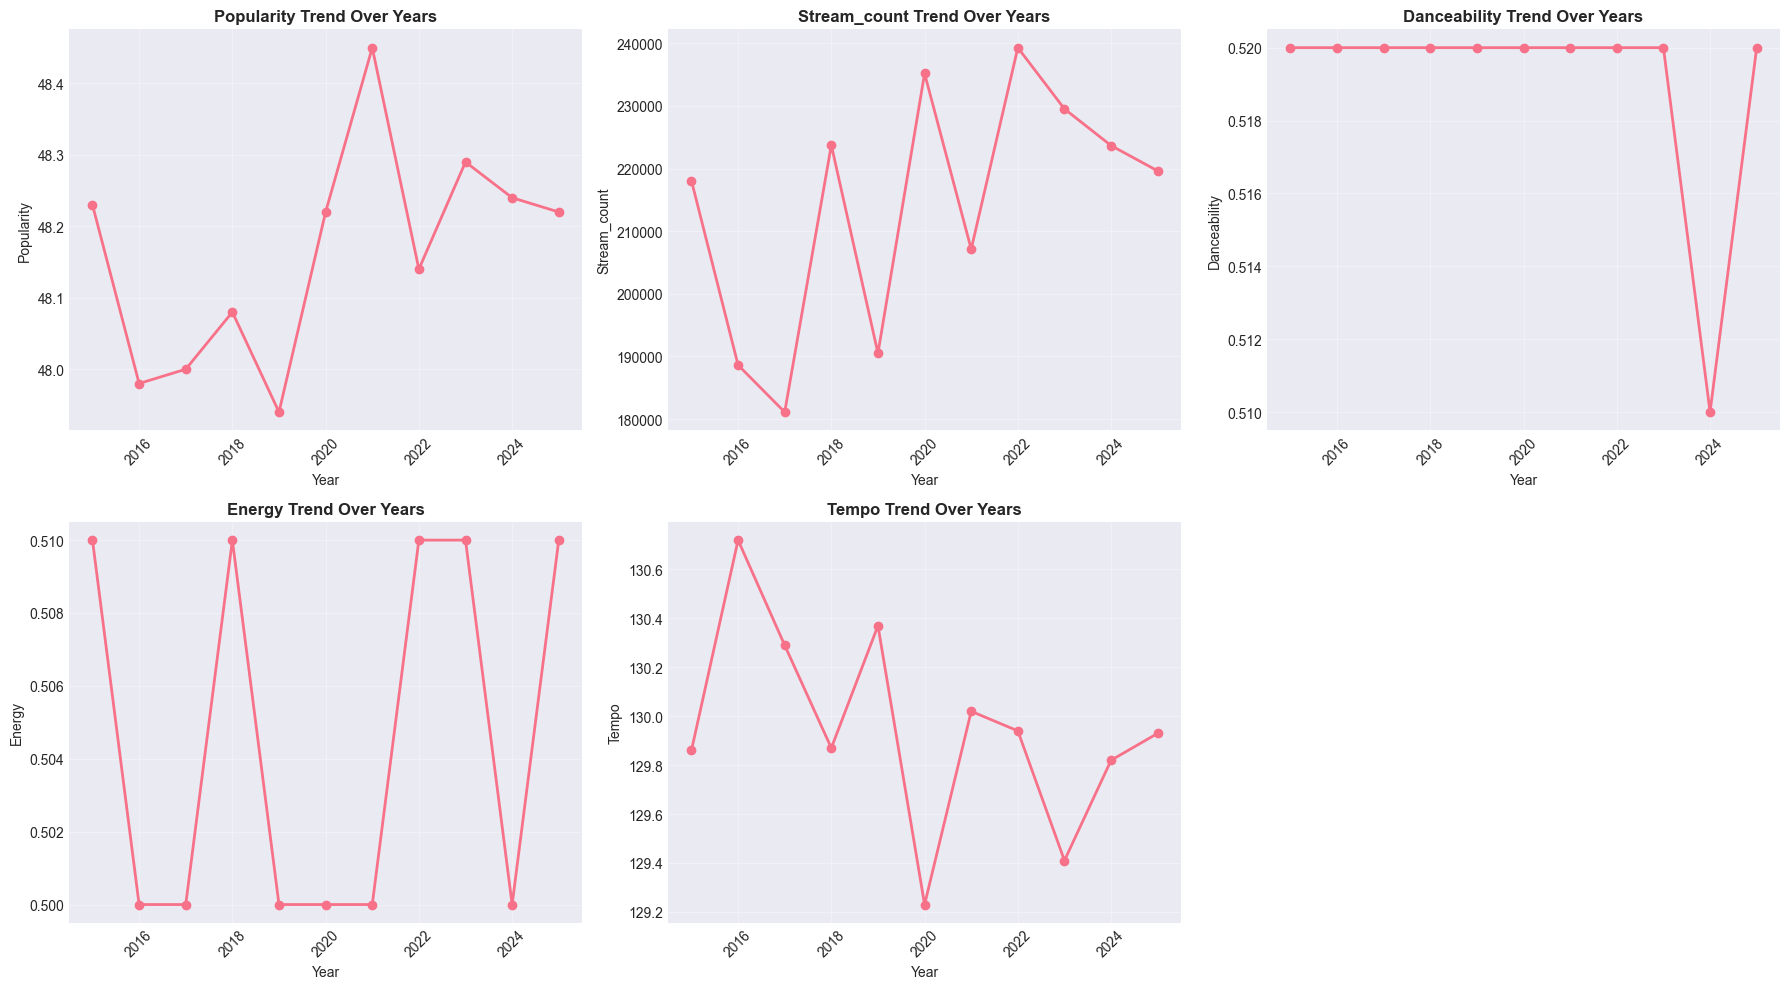

In [107]:
# Year-over-year trends
yearly_stats = df_clean.groupby('release_year').agg({
    'popularity': 'mean',
    'stream_count': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'tempo': 'mean'
}).round(2)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics = ['popularity', 'stream_count', 'danceability', 'energy', 'tempo']
for idx, metric in enumerate(metrics):
    axes[idx].plot(yearly_stats.index, yearly_stats[metric], marker='o', linewidth=2, markersize=6)
    axes[idx].set_title(f'{metric.capitalize()} Trend Over Years', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

TOP 15 COUNTRIES BY AVERAGE POPULARITY
country
United Kingdom    48.414401
Japan             48.350618
France            48.332983
Brazil            48.313545
Germany           48.074494
United States     48.062814
Canada            48.060093
Australia         48.052169
India             48.008344
Mexico            47.955505


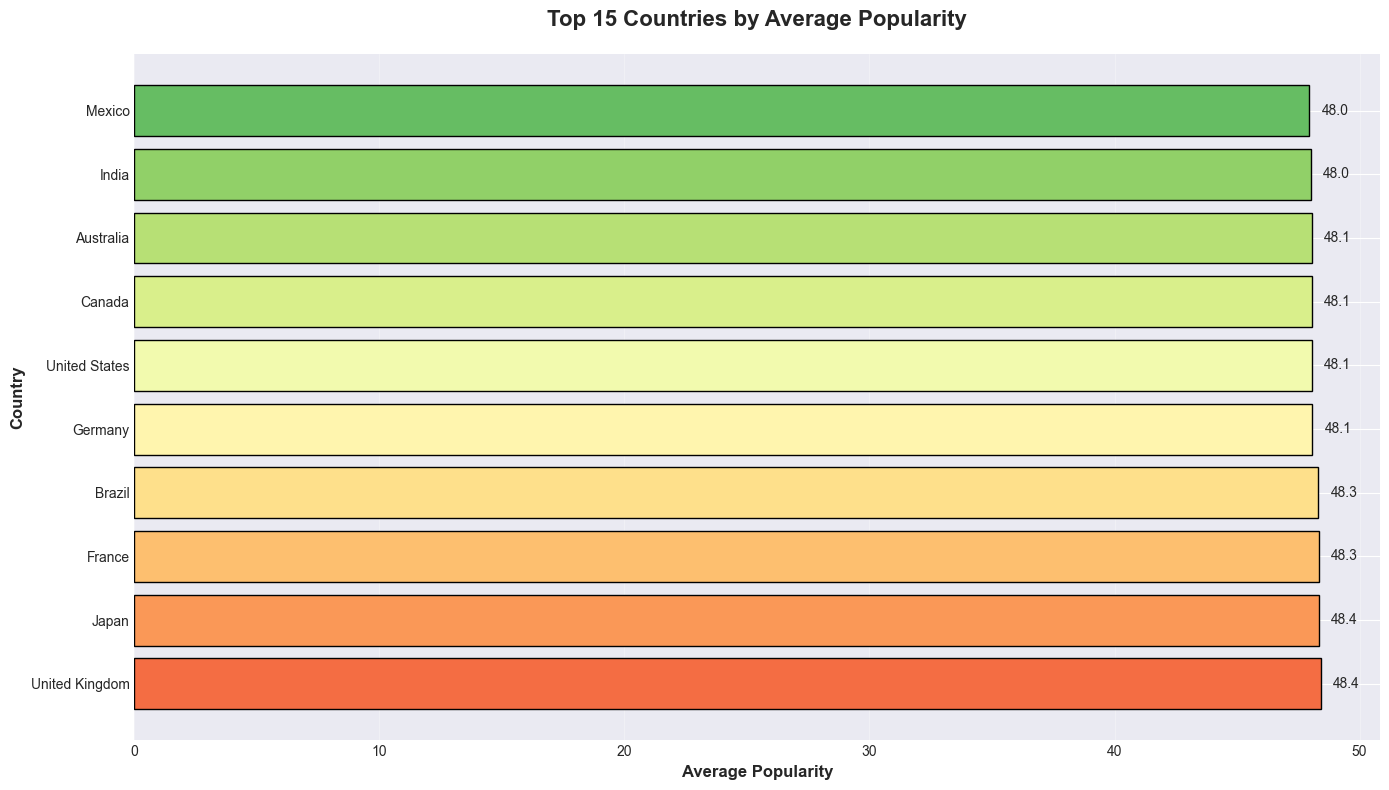

In [108]:
# Country analysis - Top countries by average popularity
print("=" * 80)
print("TOP 15 COUNTRIES BY AVERAGE POPULARITY")
print("=" * 80)
country_popularity = df_clean.groupby('country')['popularity'].mean().sort_values(ascending=False).head(15)
print(country_popularity.to_string())

plt.figure(figsize=(14, 8))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(country_popularity)))
bars = plt.barh(range(len(country_popularity)), country_popularity.values, color=colors, edgecolor='black')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.xlabel('Average Popularity', fontsize=12, fontweight='bold')
plt.title('Top 15 Countries by Average Popularity', fontsize=16, fontweight='bold', pad=20)
plt.yticks(range(len(country_popularity)), country_popularity.index)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, country_popularity.values)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [109]:
# Record label analysis
print("=" * 80)
print("RECORD LABEL ANALYSIS")
print("=" * 80)
label_stats = df_clean.groupby('label').agg({
    'popularity': 'mean',
    'stream_count': ['mean', 'sum'],
    'track_id': 'count'
}).round(2)
label_stats.columns = ['Avg_Popularity', 'Avg_Streams', 'Total_Streams', 'Song_Count']
label_stats = label_stats.sort_values('Avg_Popularity', ascending=False)
print(label_stats.head(10))

RECORD LABEL ANALYSIS
                 Avg_Popularity  Avg_Streams  Total_Streams  Song_Count
label                                                                  
Sony Music                48.33    227709.15     2420776000       10631
EMI                       48.30    231833.84     2451411000       10574
Independent               48.26    221386.64     2383670000       10767
XL Recordings             48.21    196843.36     2103665000       10687
Universal Music           48.20    216704.24     2276478000       10505
Columbia                  48.09    202284.85     2162425000       10690
Island Records            48.00    207040.37     2179514000       10527
Warner Music              47.90    211150.67     2242209000       10619


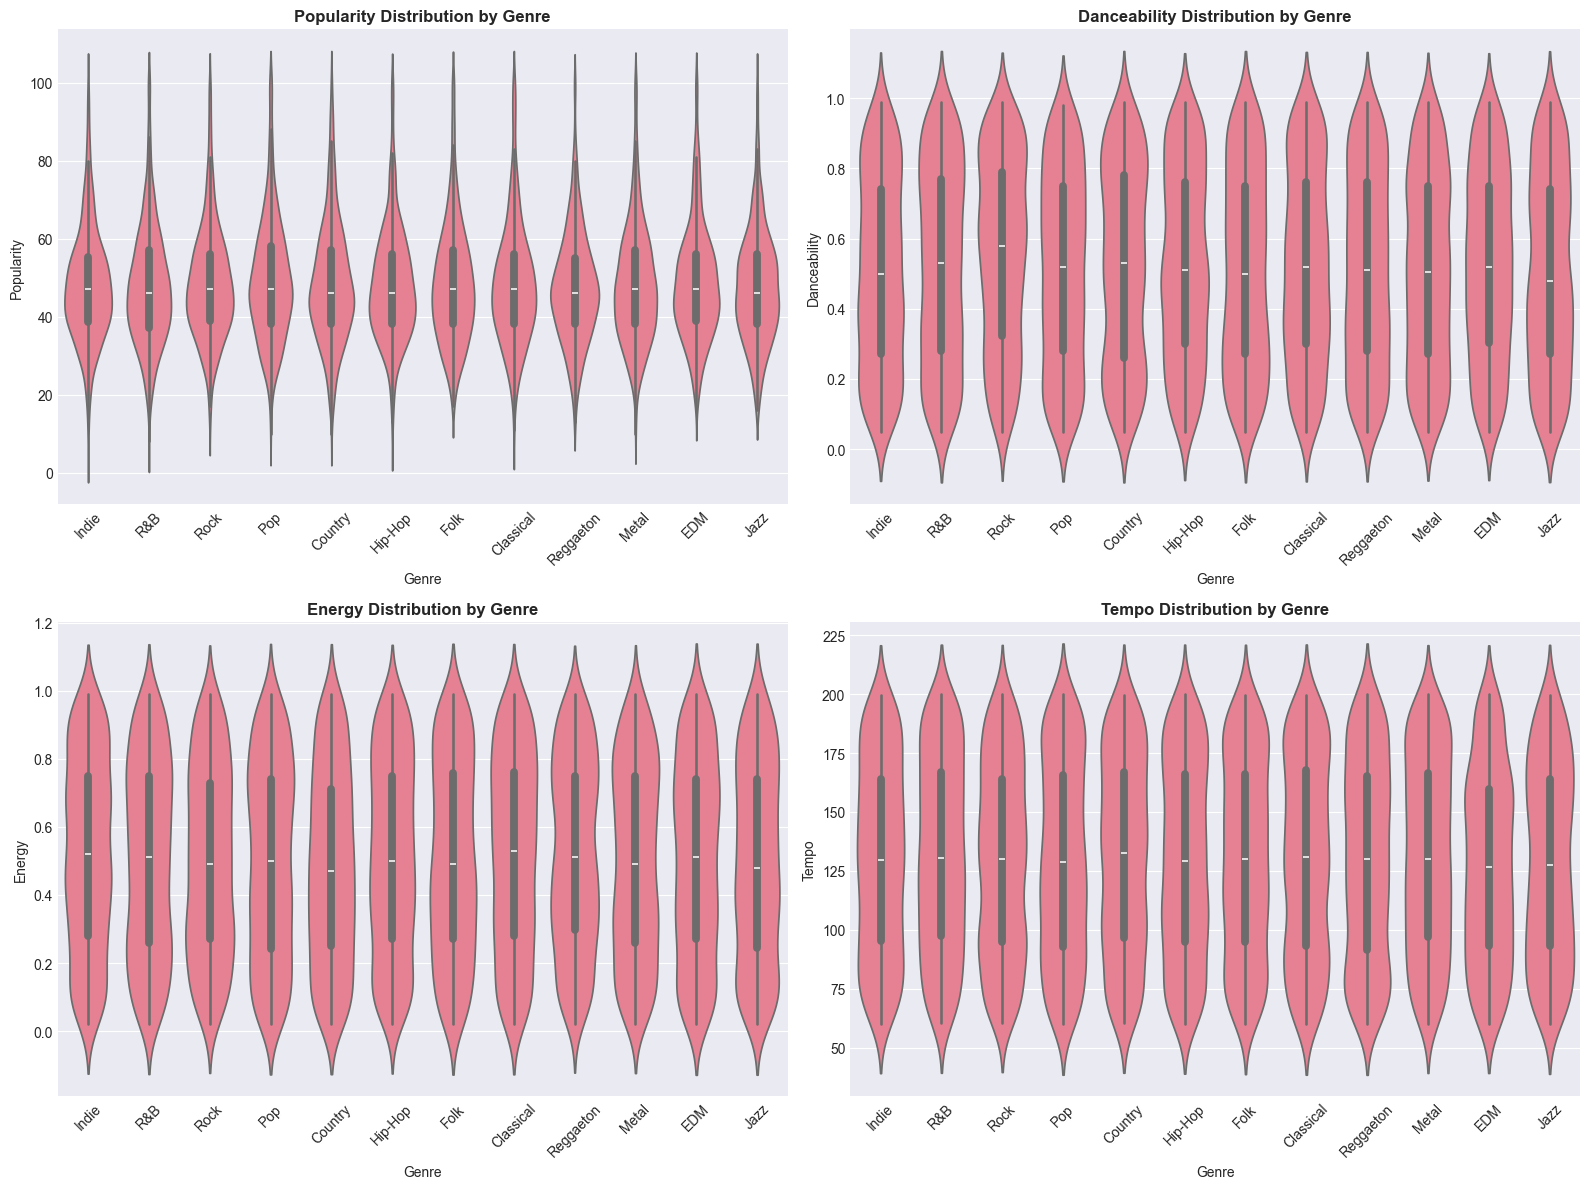

In [110]:
# Violin plots for key features by genre
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
features_to_plot = ['popularity', 'danceability', 'energy', 'tempo']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    # Sample data for better performance
    sample_data = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)
    sns.violinplot(data=sample_data, x='genre', y=feature, ax=ax)
    ax.set_title(f'{feature.capitalize()} Distribution by Genre', fontsize=12, fontweight='bold')
    ax.set_xlabel('Genre', fontsize=10)
    ax.set_ylabel(feature.capitalize(), fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# KEY INSIGHTS & PATTERNS

In [111]:
# Generate comprehensive insights
print("=" * 80)
print("KEY INSIGHTS FROM THE SPOTIFY DATASET")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total songs: {len(df_clean):,}")
print(f"   - Unique artists: {df_clean['artist_name'].nunique():,}")
print(f"   - Unique genres: {df_clean['genre'].nunique()}")
print(f"   - Date range: {df_clean['release_date'].min().date()} to {df_clean['release_date'].max().date()}")

print("\n2. POPULARITY INSIGHTS:")
print(f"   - Average popularity: {df_clean['popularity'].mean():.2f}")
print(f"   - Most popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmax()}")
print(f"   - Least popular genre: {df_clean.groupby('genre')['popularity'].mean().idxmin()}")

print("\n3. STREAMING INSIGHTS:")
print(f"   - Total streams: {df_clean['stream_count'].sum():,}")
print(f"   - Average streams per song: {df_clean['stream_count'].mean():,.0f}")
print(f"   - Genre with most streams: {df_clean.groupby('genre')['stream_count'].sum().idxmax()}")

print("\n4. AUDIO FEATURES:")
print(f"   - Average danceability: {df_clean['danceability'].mean():.3f}")
print(f"   - Average energy: {df_clean['energy'].mean():.3f}")
print(f"   - Average tempo: {df_clean['tempo'].mean():.1f} BPM")
print(f"   - Most danceable genre: {df_clean.groupby('genre')['danceability'].mean().idxmax()}")
print(f"   - Most energetic genre: {df_clean.groupby('genre')['energy'].mean().idxmax()}")

print("\n5. CONTENT ANALYSIS:")
explicit_pct = (df_clean['explicit'].sum() / len(df_clean)) * 100
print(f"   - Explicit content: {explicit_pct:.1f}%")
major_pct = (df_clean['mode'].sum() / len(df_clean)) * 100
print(f"   - Major key songs: {major_pct:.1f}%")

print("\n6. GEOGRAPHIC DISTRIBUTION:")
print(f"   - Countries represented: {df_clean['country'].nunique()}")
print(f"   - Top country by song count: {df_clean['country'].value_counts().index[0]}")

print("\n7. TEMPORAL TRENDS:")
year_with_most_songs = df_clean['release_year'].value_counts().index[0]
print(f"   - Year with most releases: {int(year_with_most_songs)}")
print(f"   - Average popularity trend: ", end="")
recent_years = df_clean[df_clean['release_year'] >= 2020]['popularity'].mean()
older_years = df_clean[df_clean['release_year'] < 2020]['popularity'].mean()
if recent_years > older_years:
    print(f"Increasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")
else:
    print(f"Decreasing (Recent: {recent_years:.1f} vs Older: {older_years:.1f})")

print("\n8. CORRELATIONS:")
corr_pop_stream = df_clean['popularity'].corr(df_clean['stream_count'])
corr_dance_energy = df_clean['danceability'].corr(df_clean['energy'])
print(f"   - Popularity vs Stream Count: {corr_pop_stream:.3f}")
print(f"   - Danceability vs Energy: {corr_dance_energy:.3f}")

print("\n" + "=" * 80)

KEY INSIGHTS FROM THE SPOTIFY DATASET

1. DATASET OVERVIEW:
   - Total songs: 85,000
   - Unique artists: 62,391
   - Unique genres: 12
   - Date range: 2015-01-01 to 2025-12-31

2. POPULARITY INSIGHTS:
   - Average popularity: 48.16
   - Most popular genre: Pop
   - Least popular genre: Jazz

3. STREAMING INSIGHTS:
   - Total streams: 18,220,148,000
   - Average streams per song: 214,355
   - Genre with most streams: Hip-Hop

4. AUDIO FEATURES:
   - Average danceability: 0.521
   - Average energy: 0.505
   - Average tempo: 129.9 BPM
   - Most danceable genre: Rock
   - Most energetic genre: EDM

5. CONTENT ANALYSIS:
   - Explicit content: 20.1%
   - Major key songs: 50.0%

6. GEOGRAPHIC DISTRIBUTION:
   - Countries represented: 10
   - Top country by song count: India

7. TEMPORAL TRENDS:
   - Year with most releases: 2015
   - Average popularity trend: Increasing (Recent: 48.3 vs Older: 48.0)

8. CORRELATIONS:
   - Popularity vs Stream Count: 0.358
   - Danceability vs Energy: -0.004

In [112]:
# Final summary statistics
print("=" * 80)
print("FINAL SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Metric': ['Total Songs', 'Unique Artists', 'Unique Genres', 'Unique Countries', 
               'Unique Labels', 'Date Range (years)', 'Avg Popularity', 
               'Avg Stream Count', 'Avg Duration (min)', 'Avg Danceability', 
               'Avg Energy', 'Avg Tempo (BPM)'],
    'Value': [
        f"{len(df_clean):,}",
        f"{df_clean['artist_name'].nunique():,}",
        f"{df_clean['genre'].nunique()}",
        f"{df_clean['country'].nunique()}",
        f"{df_clean['label'].nunique()}",
        f"{(df_clean['release_date'].max() - df_clean['release_date'].min()).days / 365:.1f}",
        f"{df_clean['popularity'].mean():.2f}",
        f"{df_clean['stream_count'].mean():,.0f}",
        f"{df_clean['duration_min'].mean():.2f}",
        f"{df_clean['danceability'].mean():.3f}",
        f"{df_clean['energy'].mean():.3f}",
        f"{df_clean['tempo'].mean():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))
print("\n" + "=" * 80)

FINAL SUMMARY STATISTICS
            Metric   Value
       Total Songs  85,000
    Unique Artists  62,391
     Unique Genres      12
  Unique Countries      10
     Unique Labels       8
Date Range (years)    11.0
    Avg Popularity   48.16
  Avg Stream Count 214,355
Avg Duration (min)    4.25
  Avg Danceability   0.521
        Avg Energy   0.505
   Avg Tempo (BPM)   129.9

